In [3]:
import cv2
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io
import heapq
import xlsxwriter


In [4]:
mat = scipy.io.loadmat('/home/peppermint/Desktop/Patients/002-112/Gas_Exchange/002112_highBW.mat')

In [5]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'bar2gas_binning', 'scan_date', 'KCO_map', 'FOV', 'rbc2gas_binning', 'bandwidth', 'mask_lobar', 'gas_biasfield', 'gas_highreso', 'gas_highSNR', 'data_dir', 'ventilation', 'RBC2barrier', 'stats_box', 'lobar_stats_ave', 'TE90', 'barrier', 'rbc2gas', 'Subject_ID', 'ute_reg', 'mask_reg_vent', 'ven_binning', 'gas_highreso_cor', 'lobar_stats_all', 'ute', 'mask', 'dissolved', 'bar2gas', 'rbc', 'KCO_binning', 'mask_reg'])

In [6]:
bar2gas = mat['bar2gas']
mask_reg = mat['mask_reg']

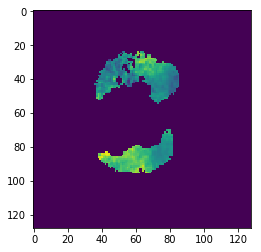

In [58]:
plt.imshow(bar2gas[50,:,:])

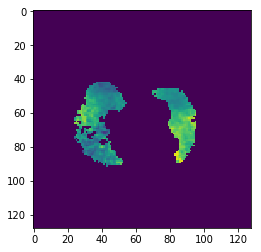

In [8]:
from scipy import ndimage

plt.imshow(ndimage.rotate(bar2gas[50,:,:], 90))


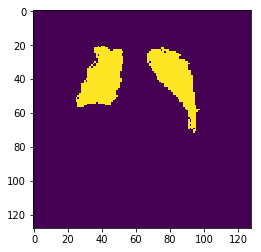

In [60]:
plt.imshow(mask_reg[:,:,50])

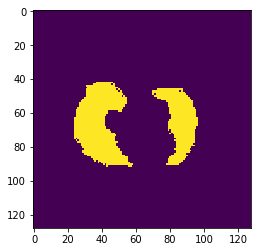

In [61]:
plt.imshow(ndimage.rotate(mask_reg[50,:,:], 90))


In [62]:
img= bar2gas[:,:,50];

In [63]:
np.max(mask_reg[:,:,50])

1

In [64]:
num_labels, labels_im = cv2.connectedComponents(mask_reg[:,:,50])

In [65]:
output=cv2.connectedComponentsWithStats(mask_reg[:,:,50],4)

In [66]:
sum(sum(labels_im==1))

643

In [67]:
sum(sum(labels_im==2))

640

In [68]:
sum(sum(labels_im==0))

15101

In [69]:
extract_label = np.zeros(labels_im.shape);
extract_label[labels_im==2]=1;

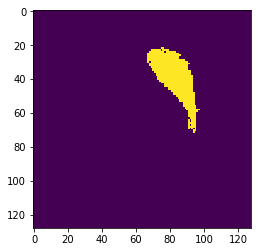

In [70]:
plt.imshow(extract_label)

In [71]:
dist_transform = cv2.distanceTransform(mask_reg[:,:,50],cv2.DIST_L2,3)

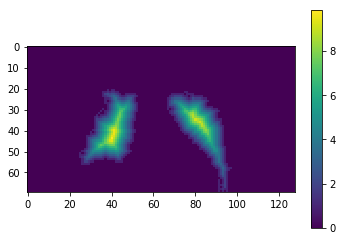

In [84]:
plt.imshow(dist_transform[:70,:])
plt.colorbar()

In [80]:
dist_transform[80,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [81]:
centroid=output[3];
centroid

array([[63.65989007, 65.50625786],
       [40.1726283 , 39.77760498],
       [83.1640625 , 39.9953125 ]])

In [74]:
stats=output[2];
stats

array([[    0,     0,   128,   128, 15101],
       [   25,    21,    28,    36,   643],
       [   67,    22,    31,    50,   640]], dtype=int32)

In [76]:
stats[1,3]

36

In [23]:
area=stats[:,4];
# Delete the background label.
area=area[1:]

In [24]:
index_label=np.array(heapq.nlargest(2, range(len(area)), key=area.__getitem__))+1;
index_label

array([1, 2])

In [25]:
index_1 = index_label[0]
index_2 = index_label[1]
if (centroid[index_1,0]<centroid[index_2,0]):
    left_label=index_1;
    right_label=index_2;
else:
    left_label=index_2;
    right_label=index_1;
    

In [26]:
left_label

1

In [27]:
labels_im = output[1];

In [28]:
[m,n] = img.shape
sum_left_out=0;
sum_right_out=0;
sum_left_in=0;
sum_right_in=0;

num_left_out=0;
num_right_out=0;
num_left_in=0;
num_right_in=0;

for i in range(m):
    for j in range(n):
        
        if(labels_im[i,j]==left_label ):
            
            if((dist_transform[i,j]>0 and dist_transform[i,j]<=4)):
                sum_left_in = sum_left_in+ img[i,j];
                num_left_in= num_left_in+1;
            else:
                sum_left_out = sum_left_out+ img[i,j];
                num_left_out= num_left_out+1;
            
            
        elif (labels_im[i,j]==right_label):
            
            if((dist_transform[i,j]>0 and dist_transform[i,j]<=4)):
                sum_right_in = sum_right_in+ img[i,j];
                num_right_in= num_right_in+1;
            else:
                sum_right_out = sum_right_out+ img[i,j];
                num_right_out= num_right_out+1;
            
            
mean=[sum_left_in/num_left_in,sum_left_out/num_left_out,sum_right_in/num_right_in,sum_right_out/num_right_out]       

In [29]:
mean

[0.583453901492148, 1.0938322961199263, 0.9918160975417437, 1.2924513313673311]

0.0
0


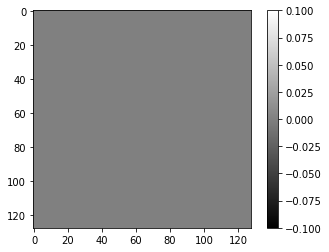

0.0
1


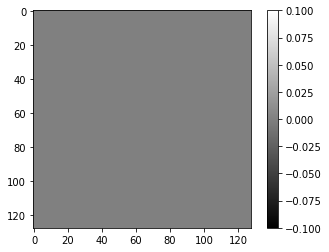

0.0
2


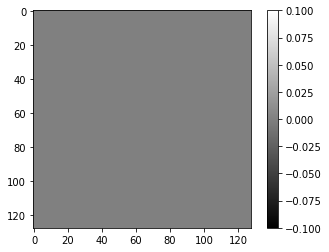

0.0
3


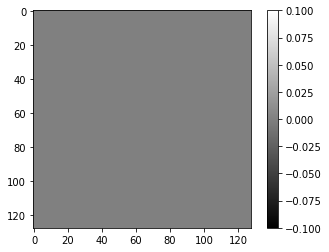

0.0
4


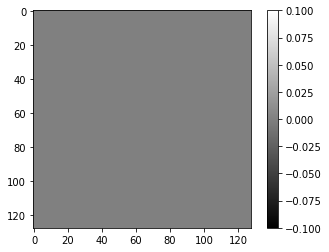

0.0
5


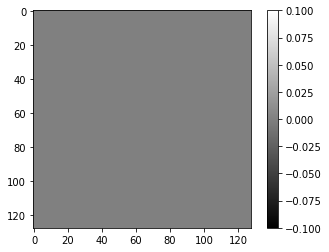

0.0
6


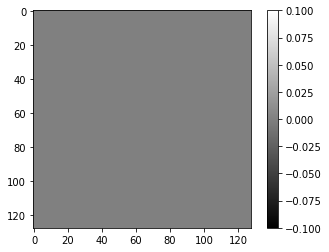

0.0
7


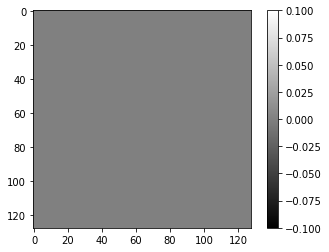

0.0
8


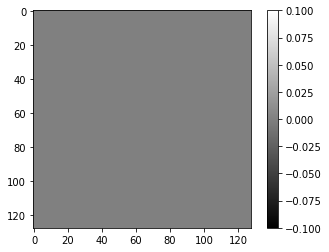

0.0
9


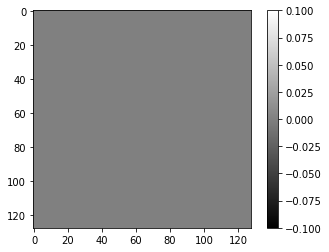

8.0
10


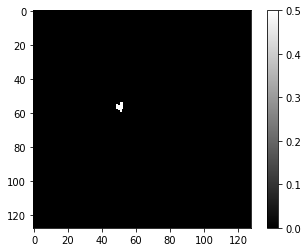

38.0
11


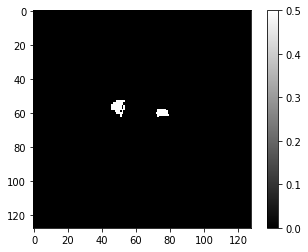

109.5
12


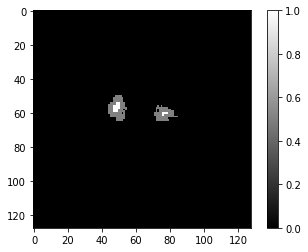

173.5
13


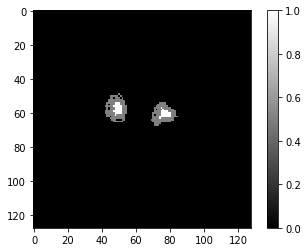

255.5
14


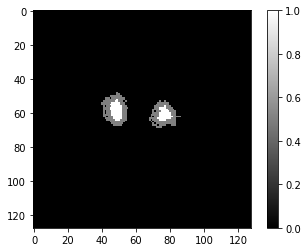

345.0
15


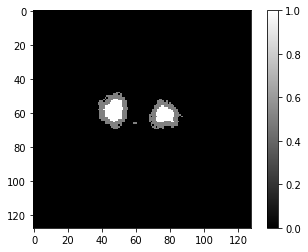

423.5
16


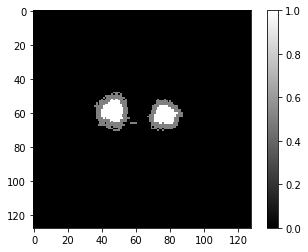

486.5
17


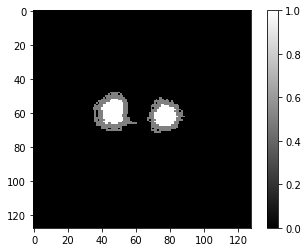

571.0
18


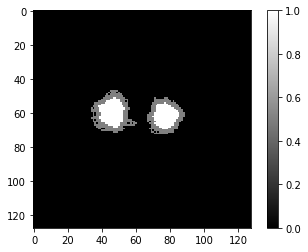

664.5
19


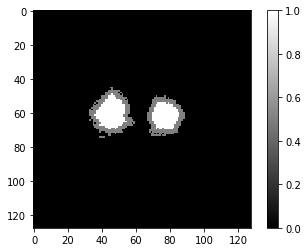

755.5
20


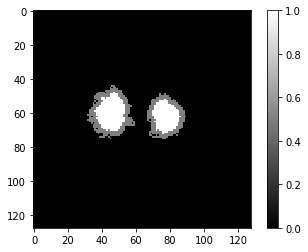

827.0
21


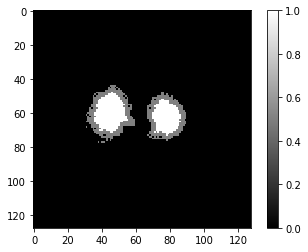

905.0
22


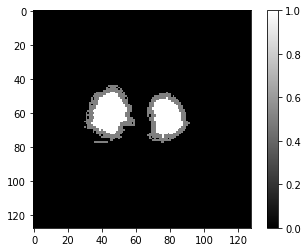

987.0
23


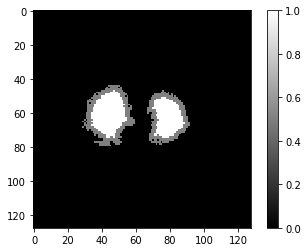

1050.0
24


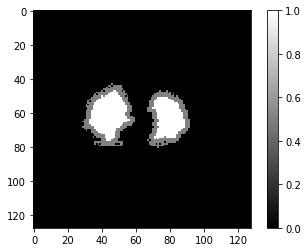

1108.0
25


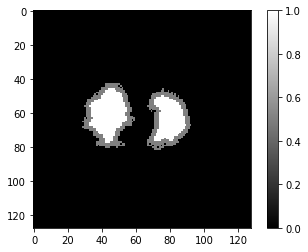

1160.0
26


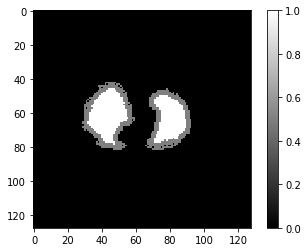

1208.5
27


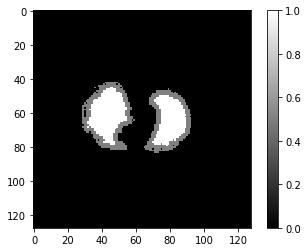

1264.5
28


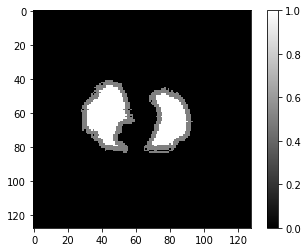

1331.0
29


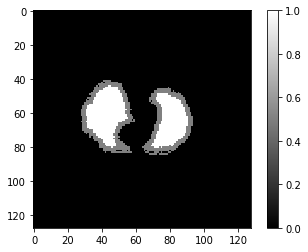

1388.5
30


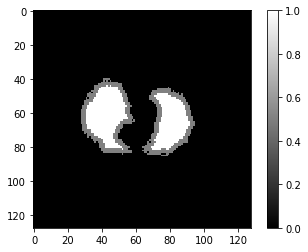

1432.0
31


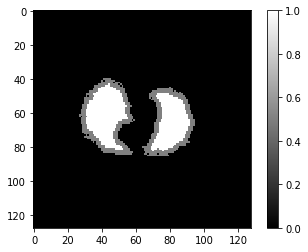

1457.5
32


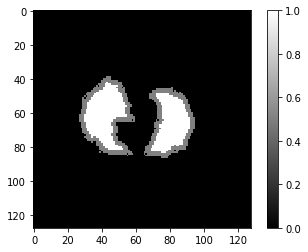

1413.0
33


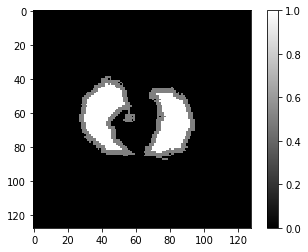

1389.0
34


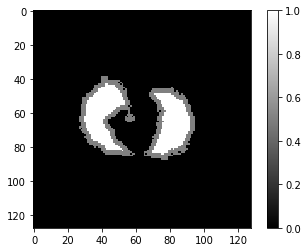

1376.5
35


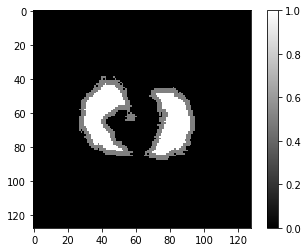

1341.5
36


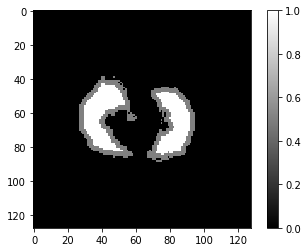

1337.0
37


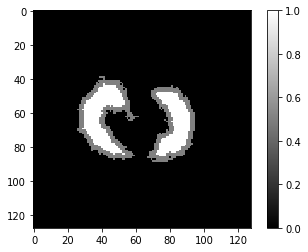

1320.5
38


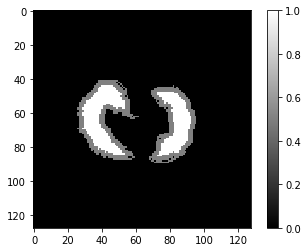

1338.0
39


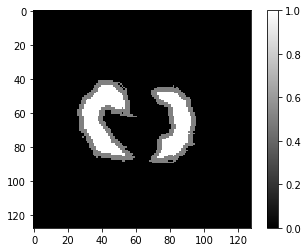

1329.5
40


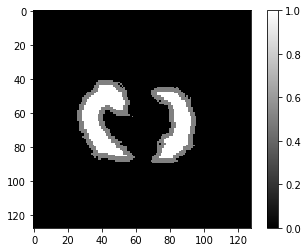

1321.5
41


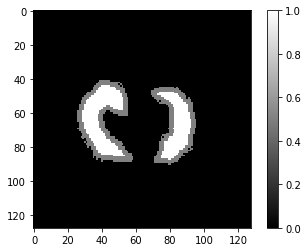

1314.0
42


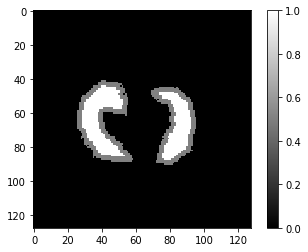

1316.5
43


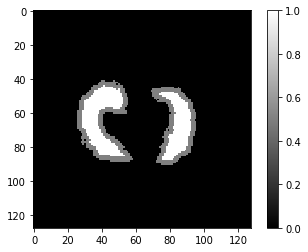

1317.0
44


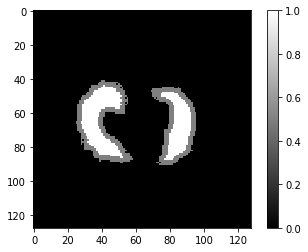

1309.5
45


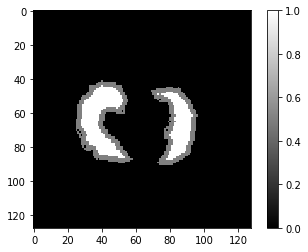

1322.5
46


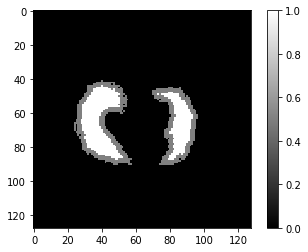

1336.5
47


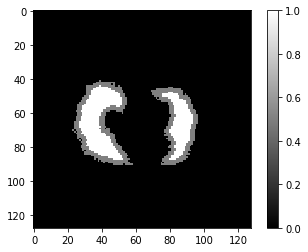

1318.5
48


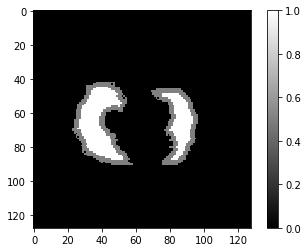

1286.0
49


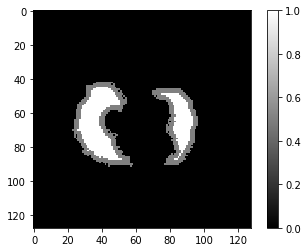

1263.5
50


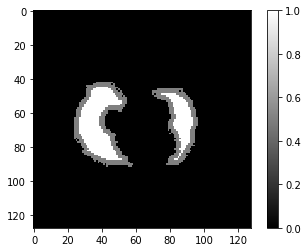

1250.5
51


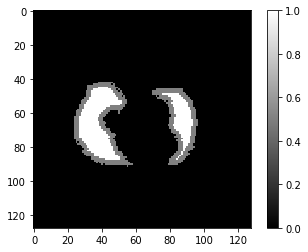

1212.0
52


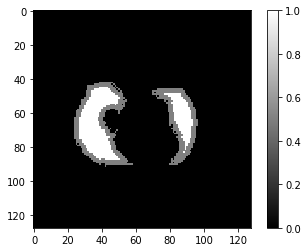

1207.0
53


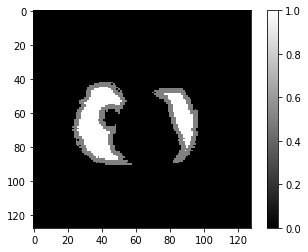

1114.5
54


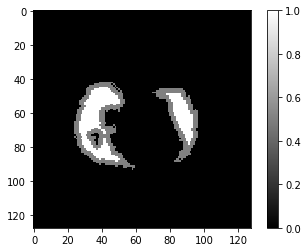

989.0
55


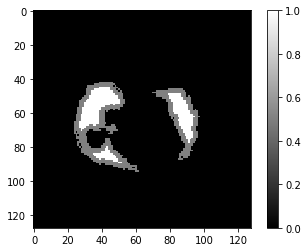

909.0
56


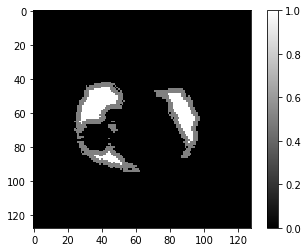

869.5
57


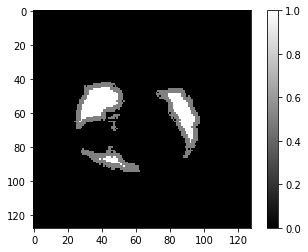

865.0
58


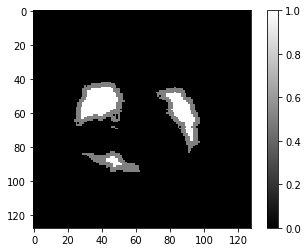

803.0
59


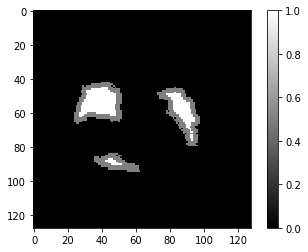

757.0
60


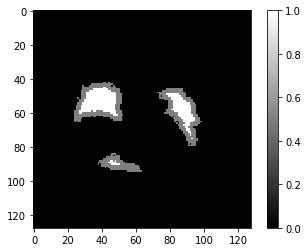

728.0
61


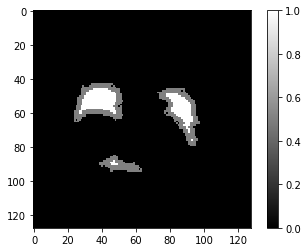

699.5
62


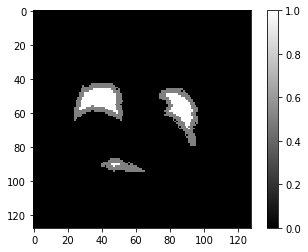

674.0
63


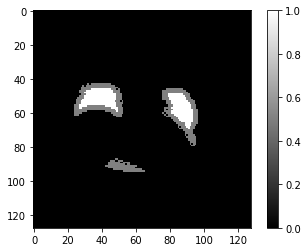

626.5
64


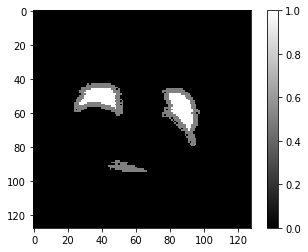

610.0
65


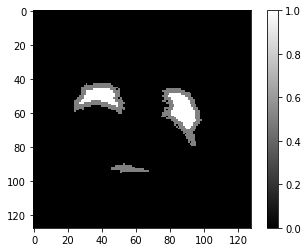

604.5
66


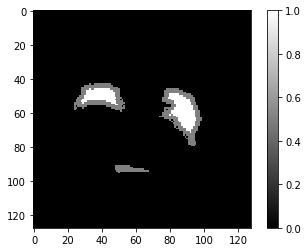

595.5
67


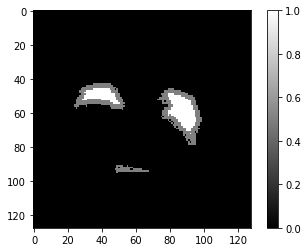

595.5
68


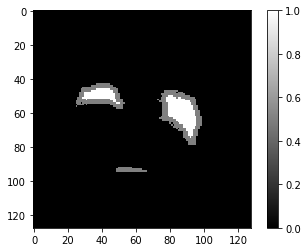

532.5
69


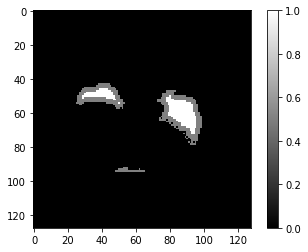

481.5
70


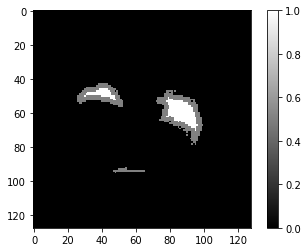

414.5
71


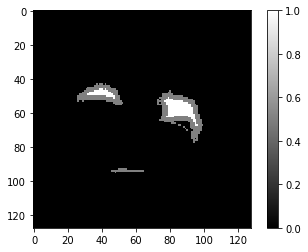

339.0
72


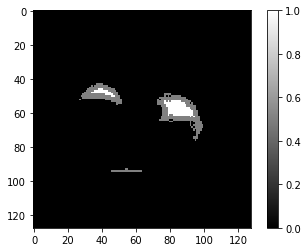

235.5
73


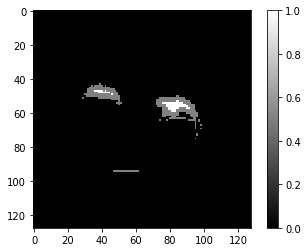

163.5
74


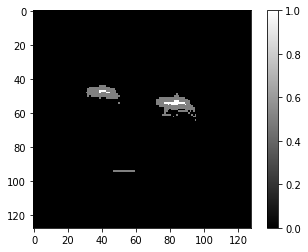

120.0
75


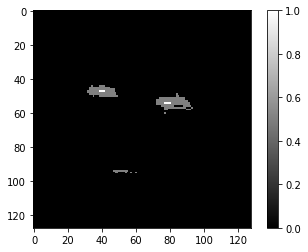

93.5
76


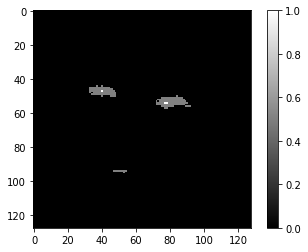

75.5
77


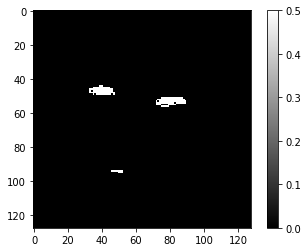

50.0
78


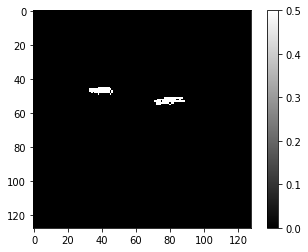

31.5
79


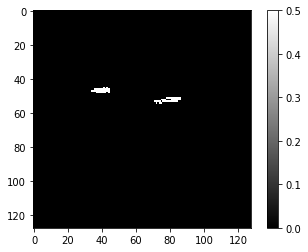

20.5
80


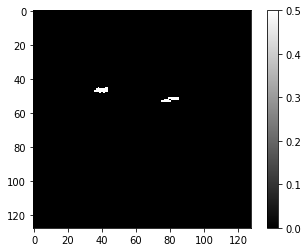

11.0
81


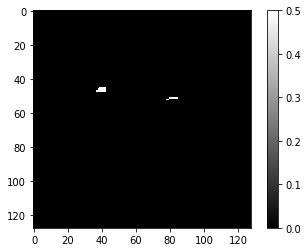

2.0
82


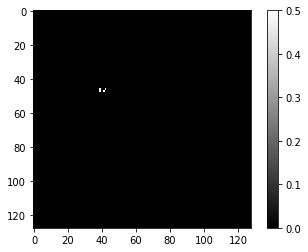

0.0
83


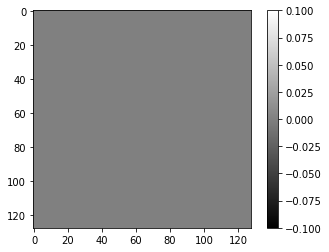

0.0
84


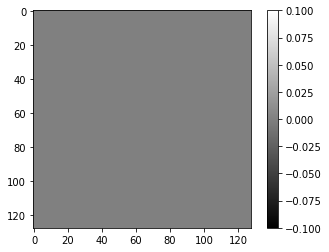

0.0
85


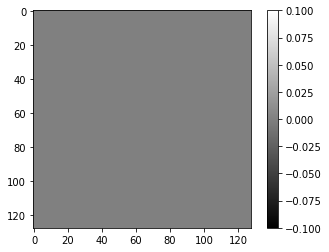

0.0
86


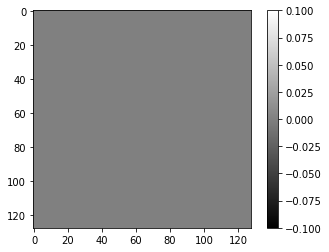

0.0
87


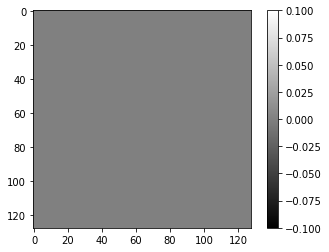

0.0
88


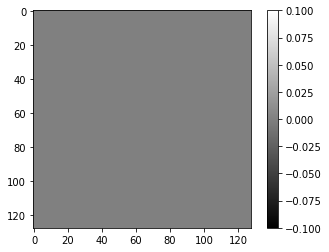

0.0
89


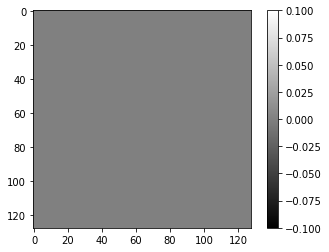

0.0
90


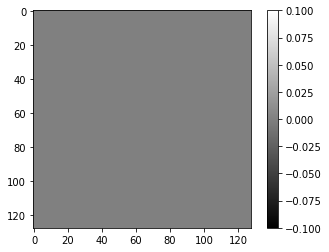

0.0
91


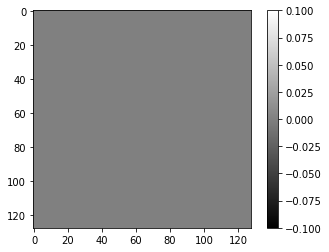

0.0
92


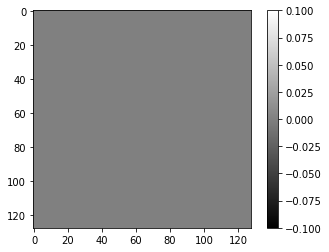

0.0
93


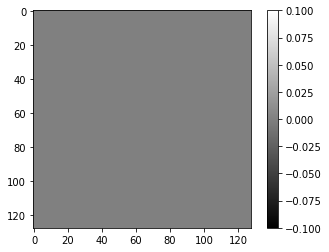

0.0
94


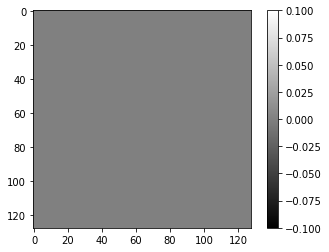

0.0
95


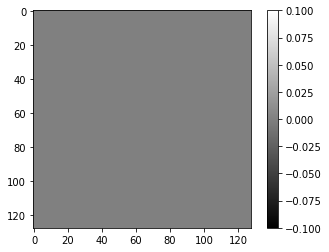

0.0
96


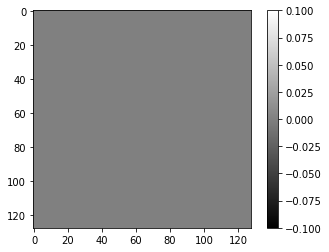

0.0
97


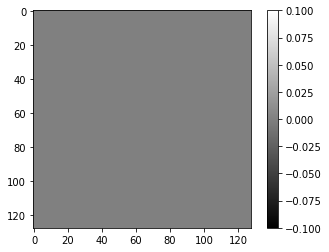

0.0
98


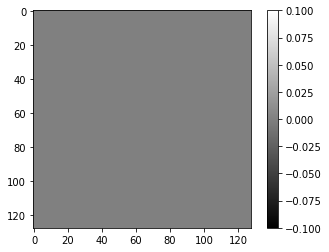

0.0
99


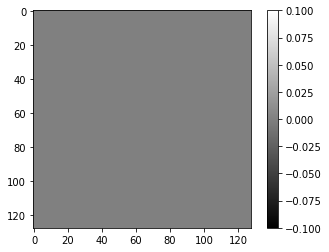

0.0
100


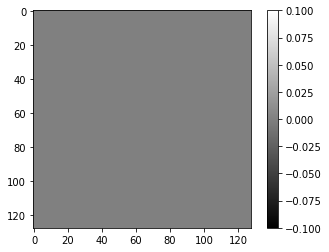

0.0
101


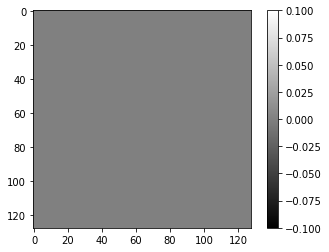

0.0
102


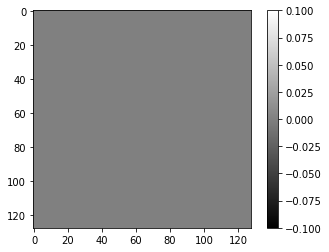

0.0
103


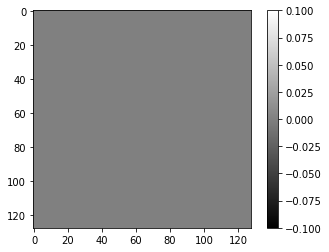

0.0
104


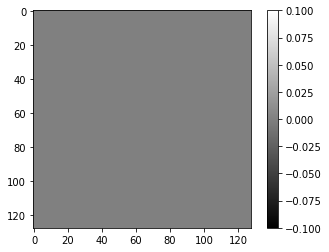

0.0
105


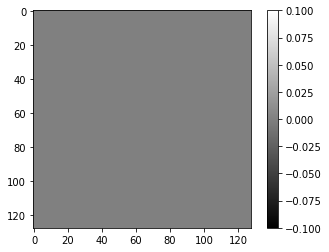

0.0
106


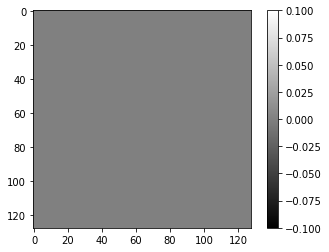

0.0
107


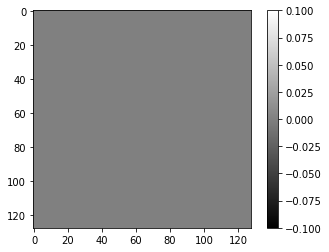

0.0
108


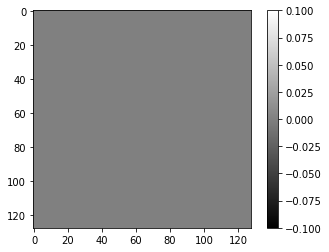

0.0
109


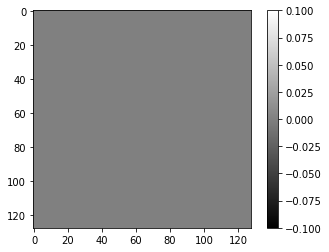

0.0
110


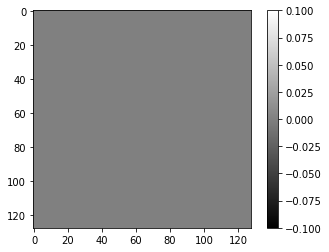

0.0
111


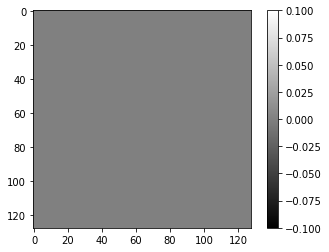

0.0
112


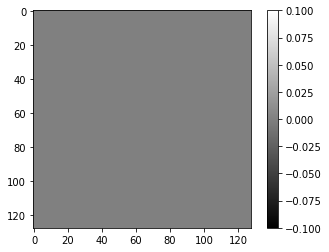

0.0
113


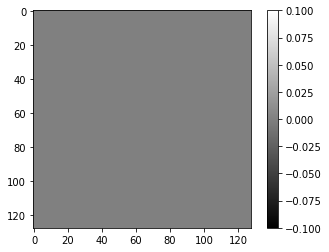

0.0
114


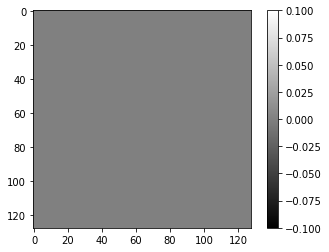

0.0
115


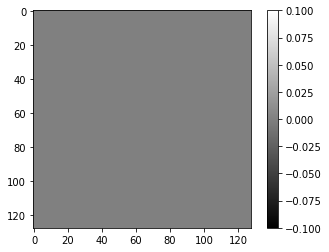

0.0
116


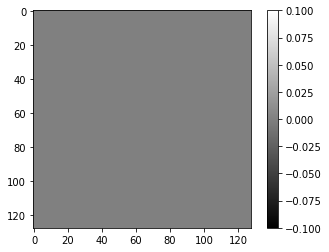

0.0
117


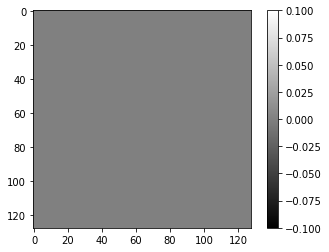

0.0
118


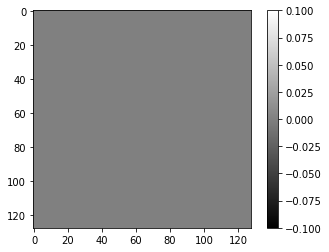

0.0
119


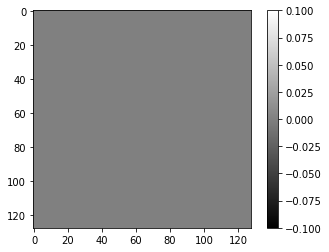

0.0
120


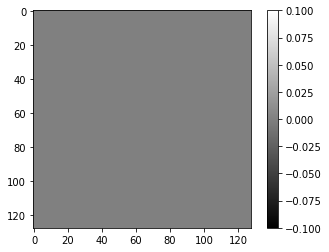

0.0
121


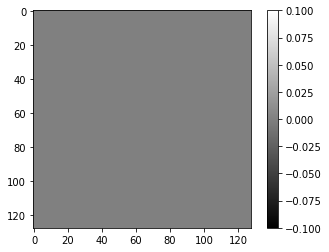

0.0
122


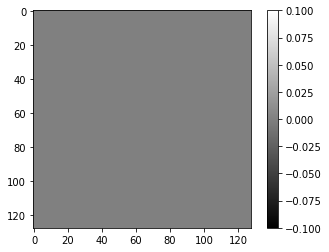

0.0
123


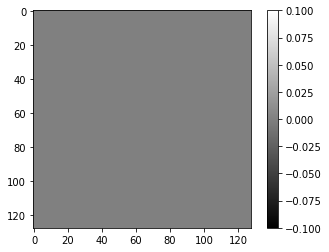

0.0
124


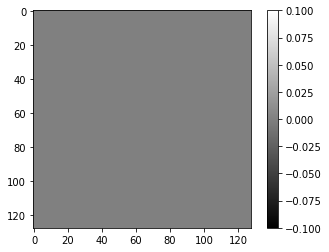

0.0
125


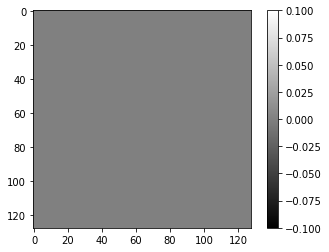

0.0
126


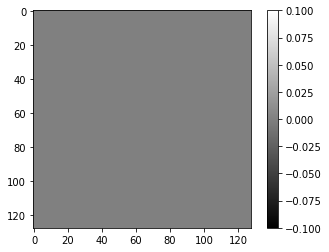

0.0
127


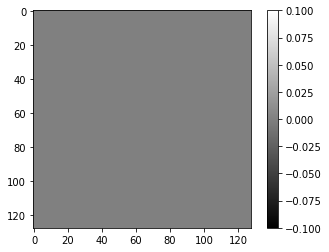

In [30]:
for i in range(128):
    m=ndimage.rotate(mask_reg[i,:,:].copy(),90);
    
    dist_transform = cv2.distanceTransform(m,cv2.DIST_L2,3)
    m=m.astype(np.float)
    m[(dist_transform>0) & (dist_transform<=3)]=0.5
    print(sum(sum(m)))
    print(i)
    plt.imshow(m, cmap='gray')
    plt.colorbar()
    plt.show()

0


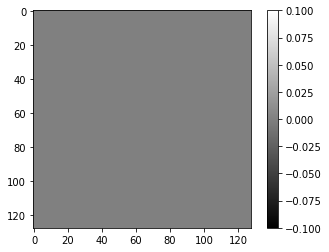

1


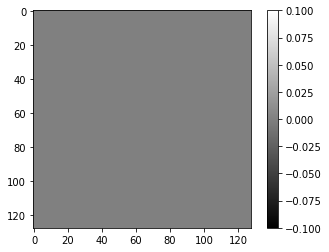

2


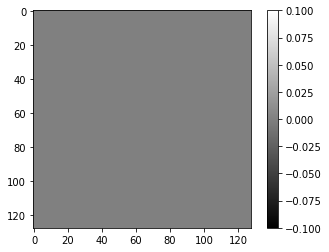

3


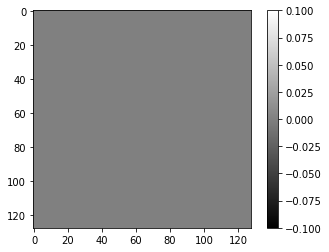

4


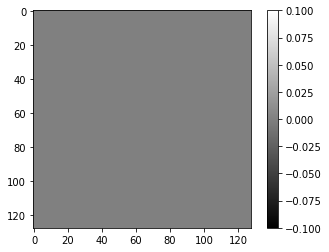

5


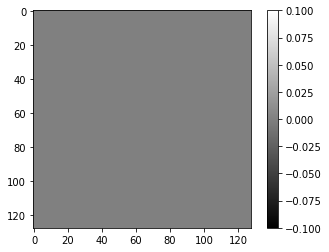

6


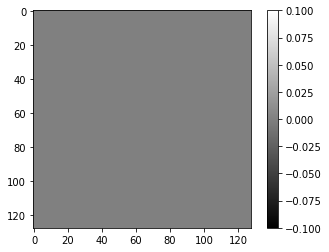

7


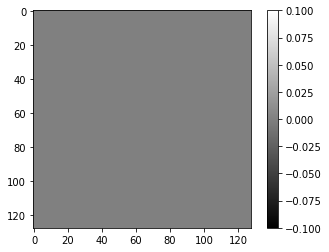

8


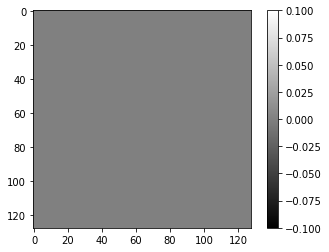

9


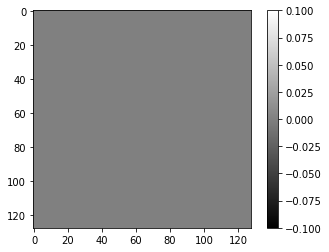

10


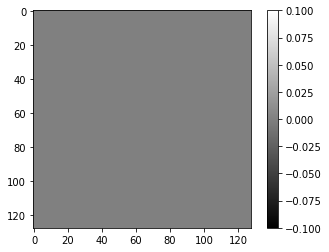

11


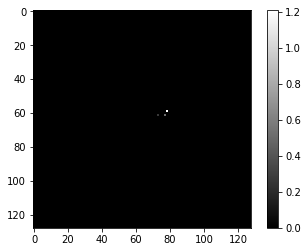

12


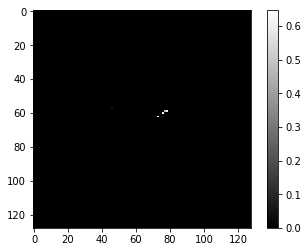

13


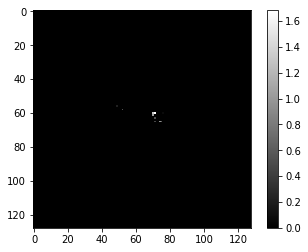

14


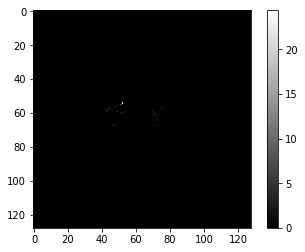

15


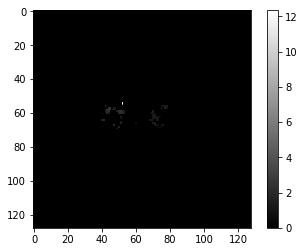

16


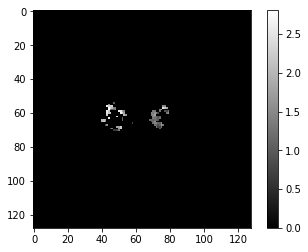

17


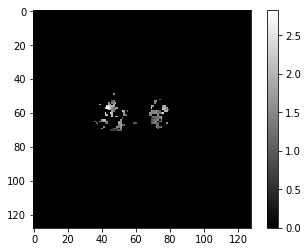

18


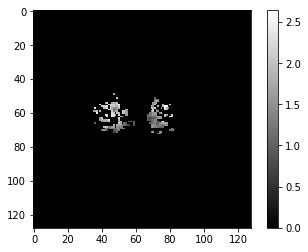

19


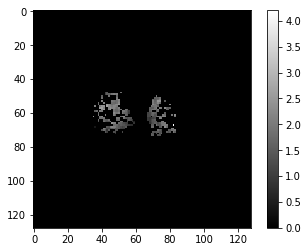

20


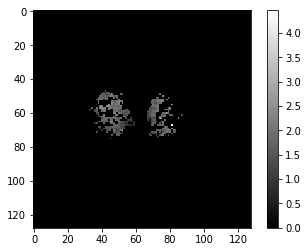

21


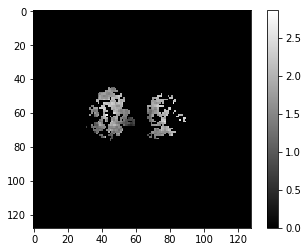

22


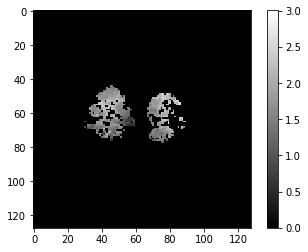

23


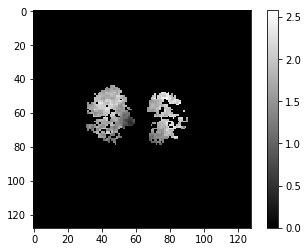

24


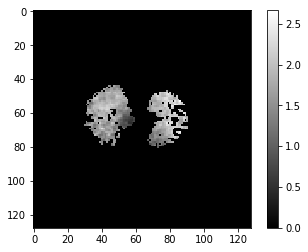

25


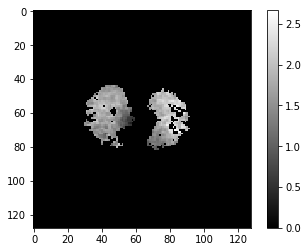

26


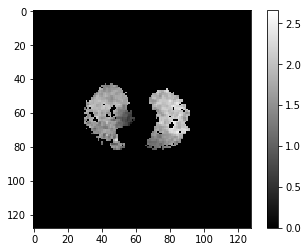

27


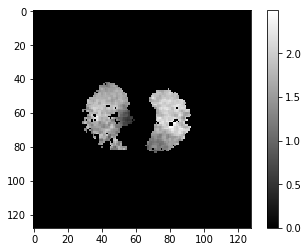

28


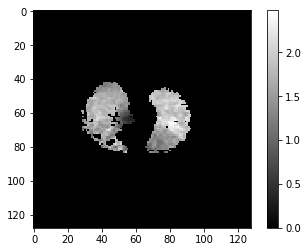

29


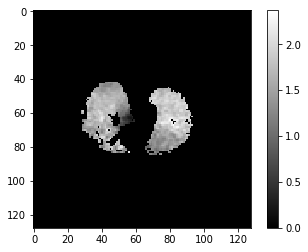

30


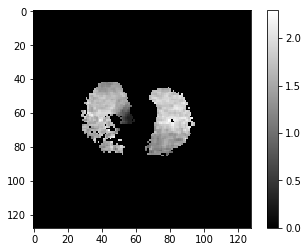

31


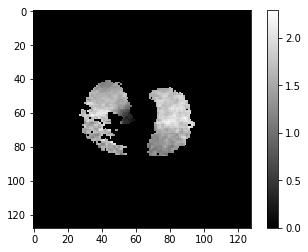

32


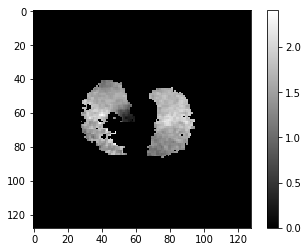

33


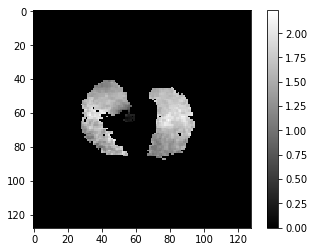

34


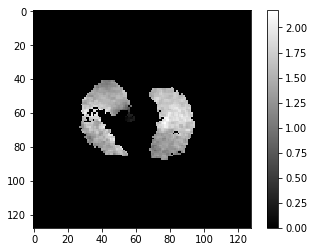

35


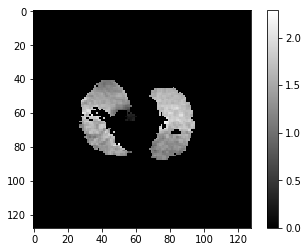

36


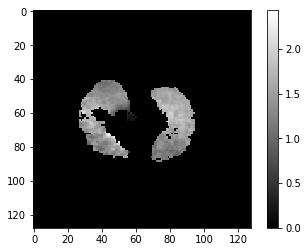

37


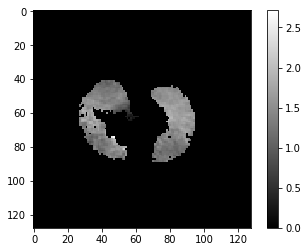

38


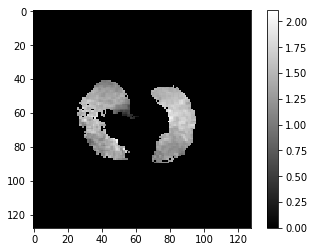

39


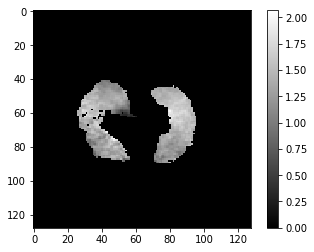

40


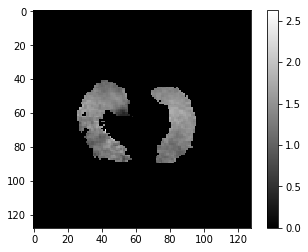

41


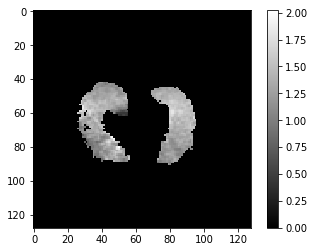

42


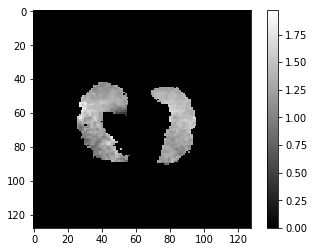

43


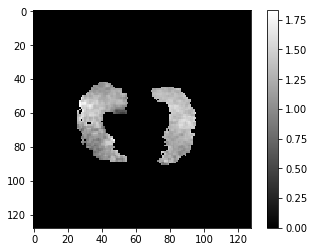

44


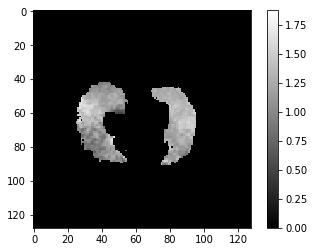

45


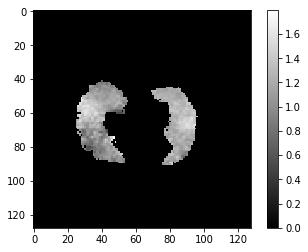

46


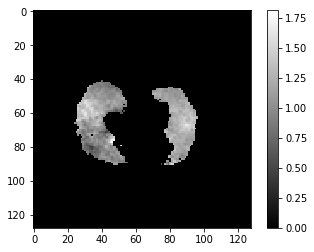

47


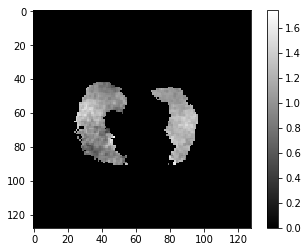

48


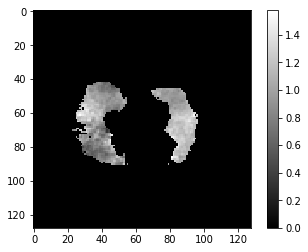

49


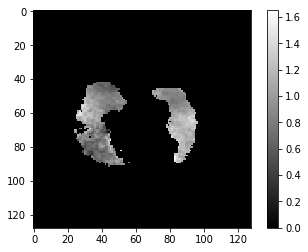

50


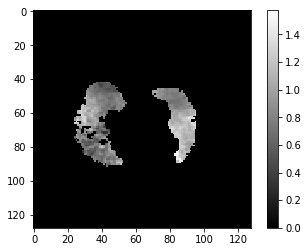

51


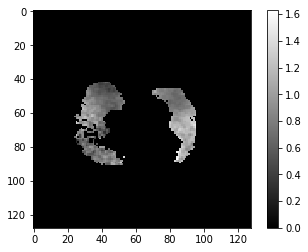

52


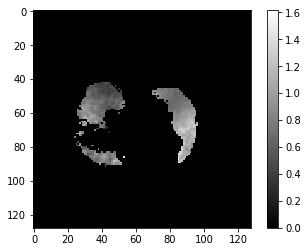

53


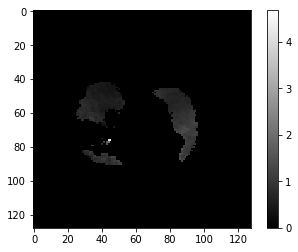

54


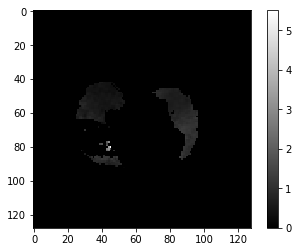

55


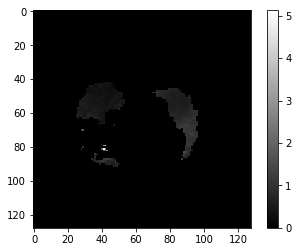

56


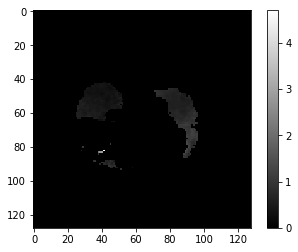

57


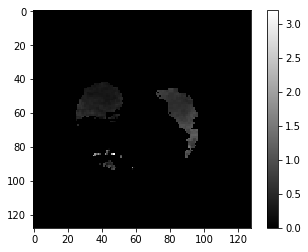

58


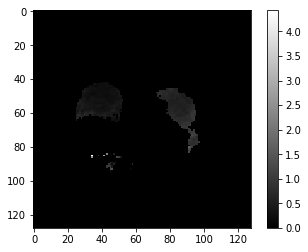

59


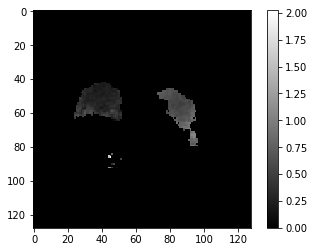

60


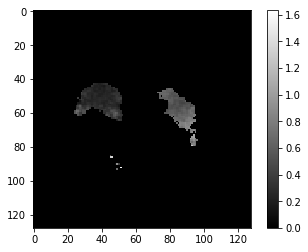

61


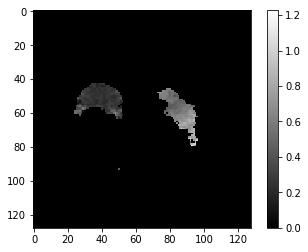

62


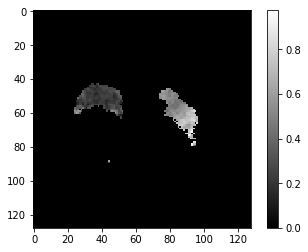

63


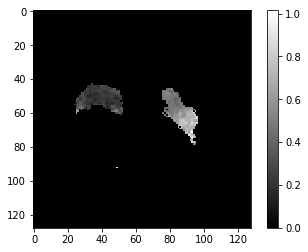

64


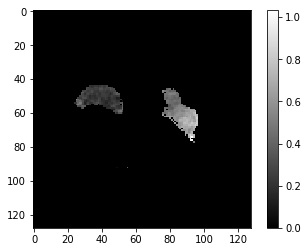

65


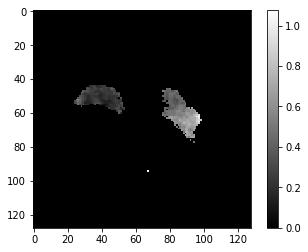

66


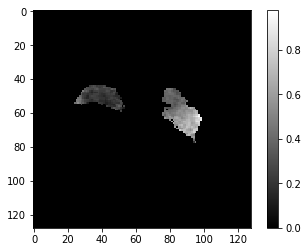

67


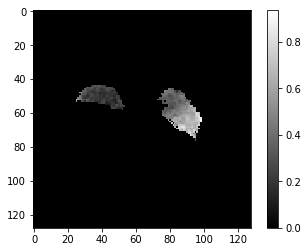

68


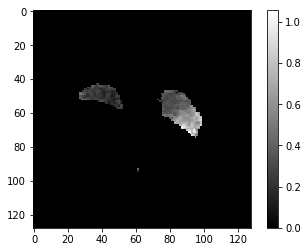

69


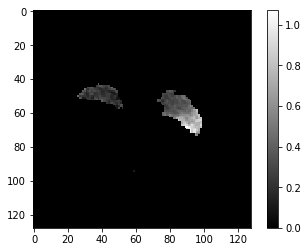

70


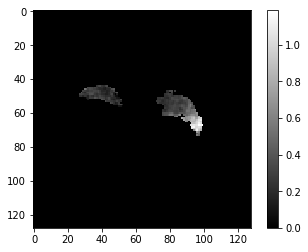

71


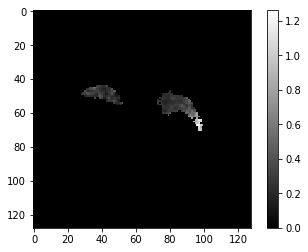

72


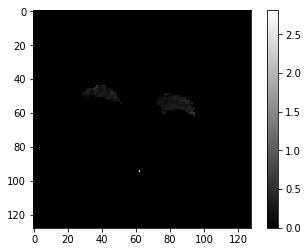

73


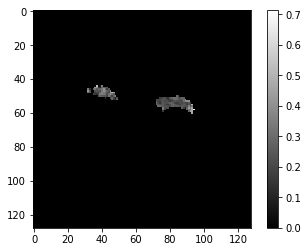

74


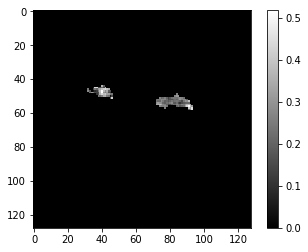

75


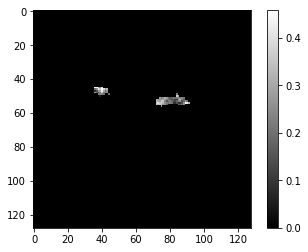

76


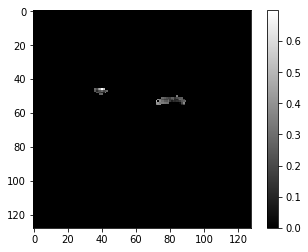

77


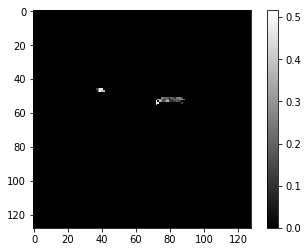

78


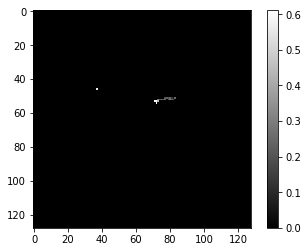

79


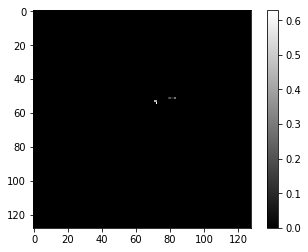

80


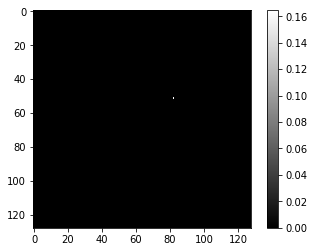

81


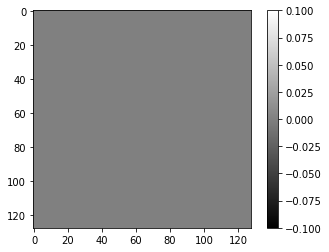

82


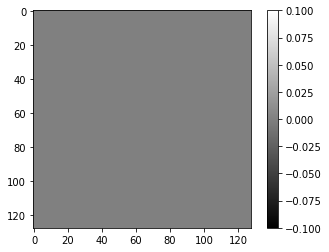

83


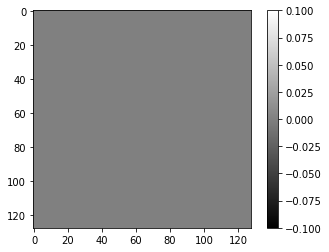

84


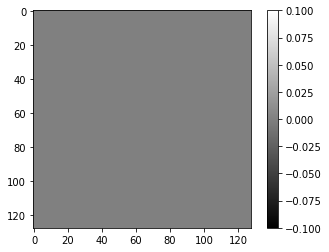

85


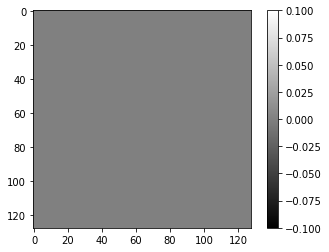

86


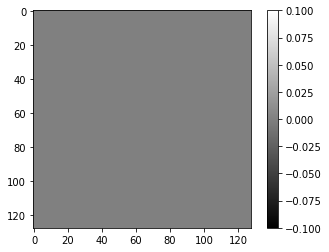

87


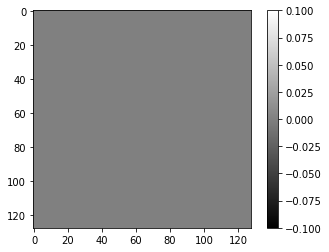

88


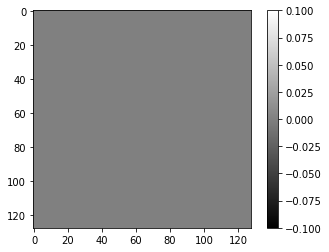

89


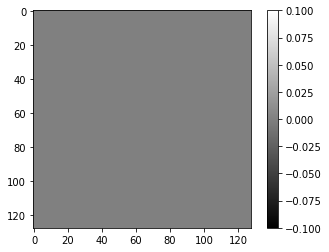

90


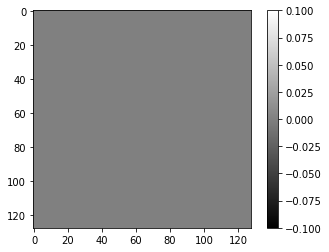

91


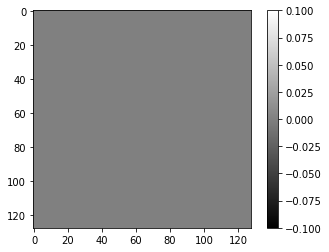

92


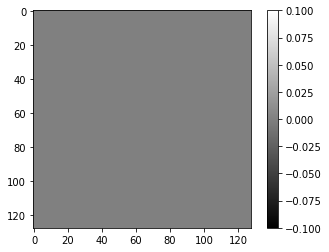

93


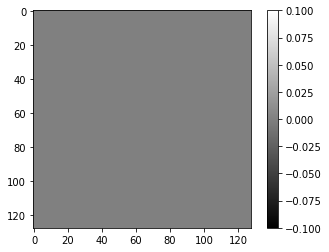

94


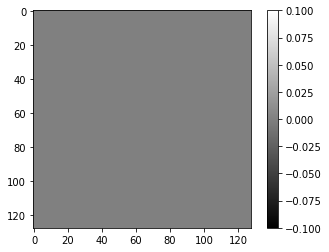

95


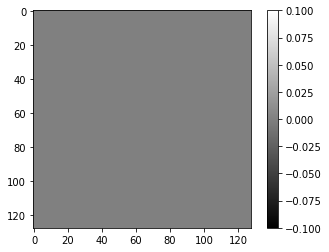

96


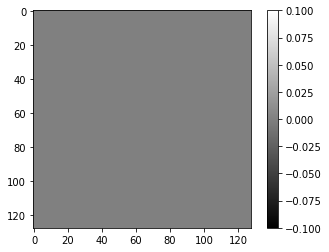

97


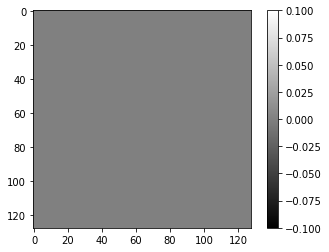

98


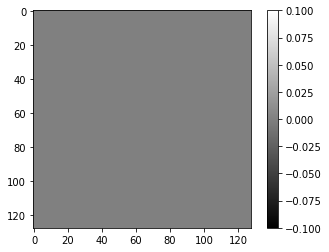

99


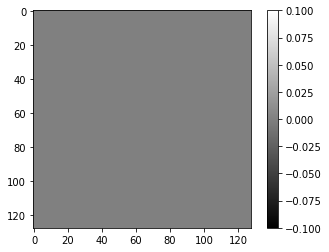

100


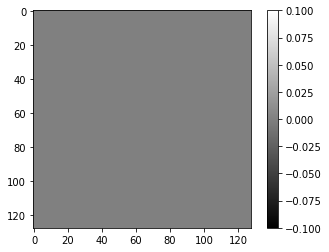

101


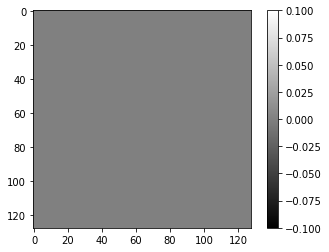

102


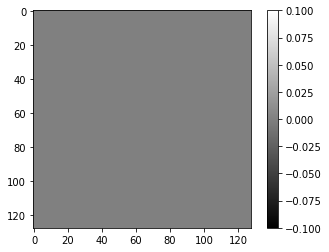

103


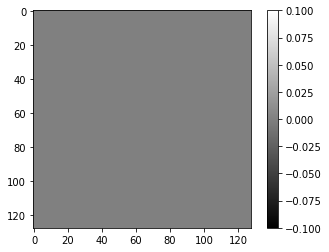

104


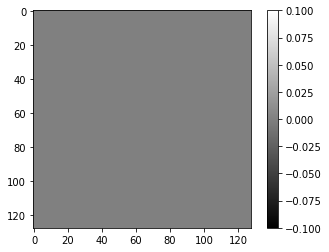

105


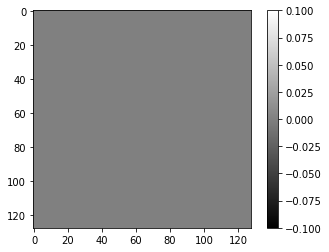

106


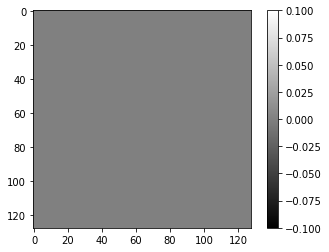

107


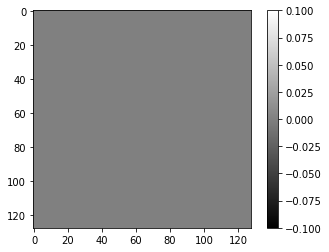

108


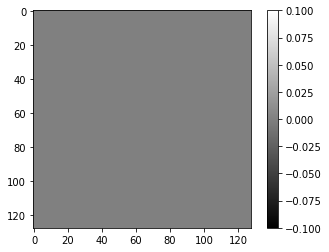

109


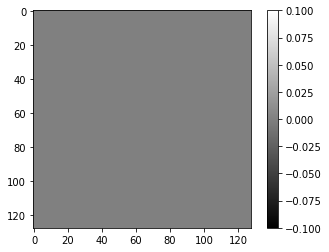

110


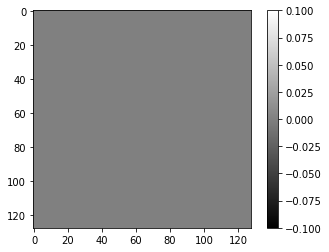

111


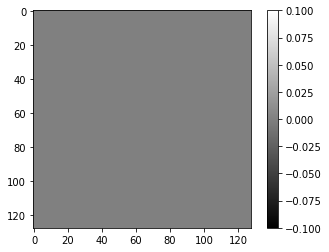

112


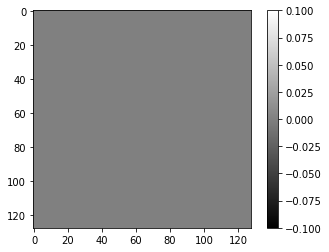

113


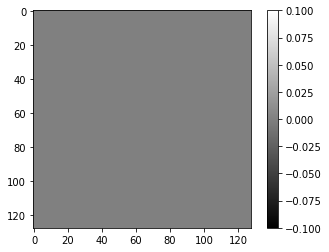

114


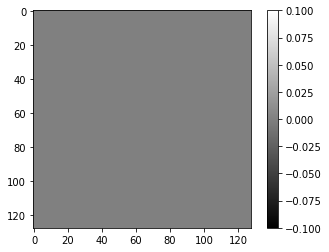

115


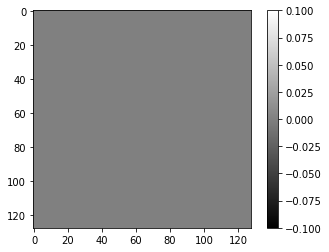

116


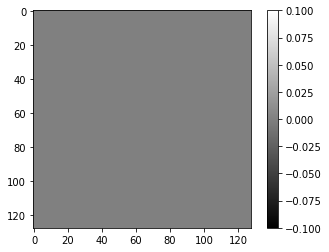

117


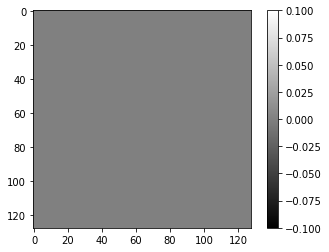

118


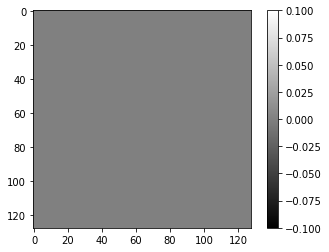

119


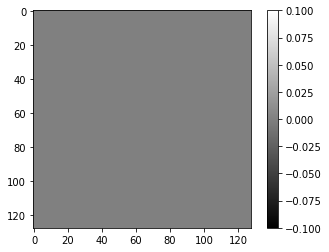

120


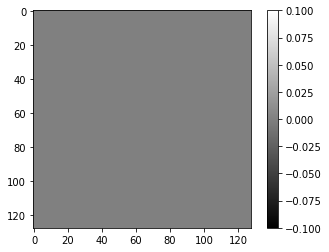

121


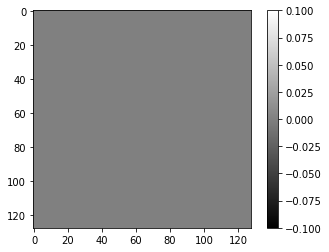

122


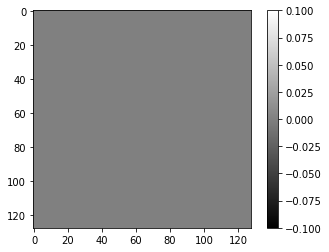

123


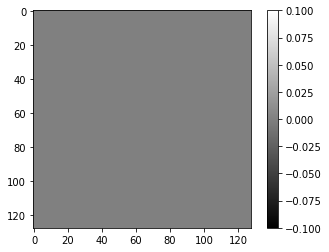

124


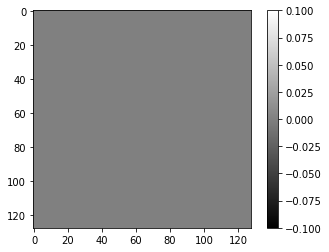

125


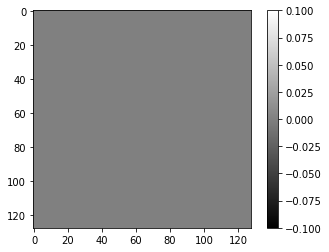

126


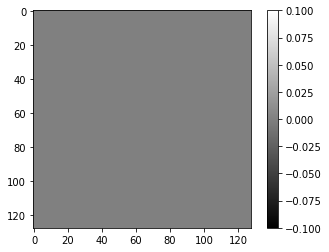

127


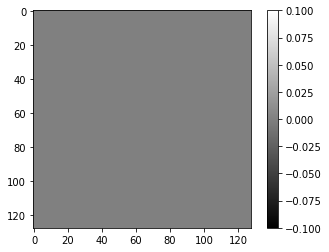

In [31]:
for i in range(128):
    m=ndimage.rotate(bar2gas[i,:,:].copy(),90);
    print(i)
    plt.imshow(m, cmap='gray')
    plt.colorbar()
    plt.show()

In [32]:
m[:,40]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [33]:
### Clean code Now Hopefully

In [34]:
# load data
mat = scipy.io.loadmat('/home/peppermint/Desktop/Patients/002-112/Gas_Exchange/002112_highBW.mat')
bar2gas = mat['bar2gas']
mask_reg = mat['mask_reg']
total_mean=[];
for ij in range(128):
    if(sum(sum(mask_reg[:,:,ij]))>=900):
        img=bar2gas[:,:,ij];

        output=cv2.connectedComponentsWithStats(mask_reg[:,:,ij],4)

        labels_im = output[1];
        stats=output[2];
        centroid=output[3];

        area=stats[:,4];
        # Delete the background label.
        area=area[1:]

        #Choose the label with largest and second largest except backgrounf
        index_label=np.array(heapq.nlargest(2, range(len(area)), key=area.__getitem__))+1;

        # Find which is left or right
        index_1 = index_label[0]
        index_2 = index_label[1]
        if (centroid[index_1,0]<centroid[index_2,0]):
            left_label=index_1;
            right_label=index_2;
        else:
            left_label=index_2;
            right_label=index_1;

        # Instant of Do morphology we create distance image 

        dist_transform = cv2.distanceTransform(mask_reg[:,:,ij],cv2.DIST_L2,3)
        [m,n] = img.shape
        sum_left_out=0;
        sum_right_out=0;
        sum_left_in=0;
        sum_right_in=0;

        num_left_out=0;
        num_right_out=0;
        num_left_in=0;
        num_right_in=0;

        for i in range(m):
            for j in range(n):

                if(labels_im[i,j]==left_label ):

                    if((dist_transform[i,j]>0 and dist_transform[i,j]<=3)):
                        sum_left_in = sum_left_in+ img[i,j];
                        num_left_in= num_left_in+1;
                    else:
                        sum_left_out = sum_left_out+ img[i,j];
                        num_left_out= num_left_out+1;


                elif (labels_im[i,j]==right_label):

                    if((dist_transform[i,j]>0 and dist_transform[i,j]<=3)):
                        sum_right_in = sum_right_in+ img[i,j];
                        num_right_in= num_right_in+1;
                    else:
                        sum_right_out = sum_right_out+ img[i,j];
                        num_right_out= num_right_out+1;

        mean=[];
        #mean=[sum_left_in/num_left_in,sum_left_out/num_left_out,sum_right_in/num_right_in,sum_right_out/num_right_out]
        if num_left_in!=0:
            mean.append(sum_left_in/num_left_in);
        if num_left_out!=0:
            mean.append(sum_left_out/num_left_out);
        if num_right_in!=0:
            mean.append(sum_right_in/num_right_in);
        if num_right_out!=0:
            mean.append(sum_right_out/num_right_out);
            
        
        total_mean.append(mean)
        print(mean)
        print(ij)

[0.5512699161424398, 0.9021027716357242, 0.8875966878975291, 1.1917401639147236]
43
[0.5028137498249304, 0.9940023438632394, 0.8949904884775085, 1.1651458170259363]
44
[0.6541090292515601, 1.014597816347715, 0.8968486785225152, 1.1643896748558273]
45
[0.6838870440223074, 1.065508335137499, 0.9232425884110791, 1.2029641068755266]
46
[0.5712000763714566, 1.1367686227398641, 0.9482455870653205, 1.2266922983664224]
47
[0.5258187035882055, 1.0931147190966912, 0.9167749096696817, 1.253087495363793]
48
[0.523539514989186, 1.0462801726013333, 0.915088652297198, 1.2657810458455876]
49
[0.5299916076876223, 1.0225746781858063, 0.9276142729705914, 1.2882503587057692]
50
[0.725995689001732, 1.0753170044065665, 0.8642645829859331, 1.3170764421675272]
51
[0.7472717673426754, 1.0704269845834753, 0.8883363002266641, 1.3339930742073525]
52
[0.6858826609307889, 1.0657499434518205, 0.8757938952743215, 1.345519942933083]
53
[0.6543935465835823, 1.1330859078696085, 0.9011559086326086, 1.3799742987045538]
54

In [35]:
total_mean=np.array(total_mean)

In [36]:
total_mean

array([[0.55126992, 0.90210277, 0.88759669, 1.19174016],
       [0.50281375, 0.99400234, 0.89499049, 1.16514582],
       [0.65410903, 1.01459782, 0.89684868, 1.16438967],
       [0.68388704, 1.06550834, 0.92324259, 1.20296411],
       [0.57120008, 1.13676862, 0.94824559, 1.2266923 ],
       [0.5258187 , 1.09311472, 0.91677491, 1.2530875 ],
       [0.52353951, 1.04628017, 0.91508865, 1.26578105],
       [0.52999161, 1.02257468, 0.92761427, 1.28825036],
       [0.72599569, 1.075317  , 0.86426458, 1.31707644],
       [0.74727177, 1.07042698, 0.8883363 , 1.33399307],
       [0.68588266, 1.06574994, 0.8757939 , 1.34551994],
       [0.65439355, 1.13308591, 0.90115591, 1.3799743 ],
       [0.63064664, 1.19121799, 0.86697566, 1.34952336],
       [0.56375993, 1.2619167 , 0.92212018, 1.4131757 ],
       [0.55881969, 1.19042925, 0.84956337, 1.43087767],
       [0.55880116, 1.1873415 , 0.85188724, 1.4365803 ],
       [0.53423212, 1.20957811, 0.90478875, 1.41773858],
       [0.59173009, 1.19855906,

In [37]:
total_mean=np.mean(total_mean,axis=0)

In [38]:
total_mean

array([0.58982921, 1.05825745, 0.86607094, 1.20142141])

In [39]:
from xlutils.copy import copy    
from xlrd import open_workbook

name = "000001_highBW";

excel_ro = open_workbook("/home/peppermint/Desktop/first_try.xls")
excel = copy(excel_ro)  # creates a writeable copy
# find the last line
sheet1 = excel.get_sheet(0)  # get a first sheet
tempt_sheet = excel_ro.sheet_by_index(0)
colx = 0

#for rowx in range(last_line+1):
    # Write the data to rox, column
rowx = tempt_sheet.nrows;
sheet1.write(rowx,colx, name)
sheet1.write(rowx,colx+1, total_mean[0])
sheet1.write(rowx,colx+2, total_mean[1])
sheet1.write(rowx,colx+3, total_mean[2])
sheet1.write(rowx,colx+4, total_mean[3])

excel.save("/home/peppermint/Desktop/first_try.xls")

In [40]:
excel_ro = open_workbook("/home/peppermint/Desktop/first_try.xls")
excel = copy(excel_ro)  # creates a writeable copy
sheet1 = excel_ro.sheet_by_index(0)  # get a first sheet


In [41]:
print(sheet1.nrows)

286


In [42]:
import os

In [43]:
path = os.path.abspath("/home/peppermint/Desktop/Patients")
print(path)
files = []
paths=[];
# Find file with _ute.ni 

for r, d, f in os.walk(path):
    d.sort()
    for file in f:
        if '.mat' in file:
            index=-3;
            name=[];
            find_=False;
            #print(r)
            while(not find_):
                if(file[index]=='.'):
                    find_= True;
                index=index-1;
                if(find_):
                    name.append(file[0:index+1]);
            files.append(name)
            paths.append(r)


/home/peppermint/Desktop/Patients


In [44]:
files

[['000001_highBW'],
 ['000001'],
 ['000001A'],
 ['000001A_highBW'],
 ['000001B_highBW'],
 ['000001H_highBW'],
 ['000001P_highBW'],
 ['001001_highBW'],
 ['003023_highBW'],
 ['003023_hrep'],
 ['002071A_rep'],
 ['002071A'],
 ['002077A_rep'],
 ['002077A'],
 ['002087A'],
 ['002087A_rep'],
 ['002087B_highBW'],
 ['002087B'],
 ['002087C_highBW'],
 ['002094C_highBW'],
 ['002094C'],
 ['002098'],
 ['002098A'],
 ['002099'],
 ['002099_rep'],
 ['002100'],
 ['002101_highBW'],
 ['002101'],
 ['002102'],
 ['002103'],
 ['002104'],
 ['002105'],
 ['002105_highBW'],
 ['002106_highBW'],
 ['002106'],
 ['002107'],
 ['002108'],
 ['002108_highBW'],
 ['002109_highBW'],
 ['002110_highBW'],
 ['002110'],
 ['002111'],
 ['002111_highBW'],
 ['002112_highBW'],
 ['002113_highBW'],
 ['002114_highBW'],
 ['002115_highBW'],
 ['002116_hrep'],
 ['002116_highBW'],
 ['002116_rep'],
 ['002117_highBW'],
 ['002118_highBW'],
 ['002119_highBW'],
 ['002120_highBW'],
 ['002121_highBW'],
 ['002122_highBW'],
 ['002123_highBW'],
 ['002124

In [45]:
print(paths[1]+'/'+str(files[1][0])+'_highBW.mat')

/home/peppermint/Desktop/Patients/000-001/Gas_Exchange/000001_highBW.mat


In [46]:
files[0]
import math

In [47]:
math.isnan([np.nan,1,2])

TypeError: must be real number, not list

In [ ]:

# Dont run this it will error

def imshow_components(labels):
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0

    cv2.imshow('labeled.png', labeled_img)
    

imshow_components(labels_im)

1726.0
127


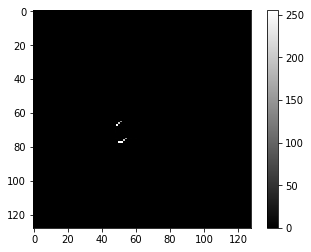

61398.0
127


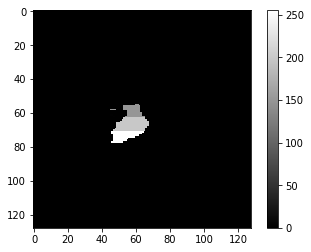

40910.0
127


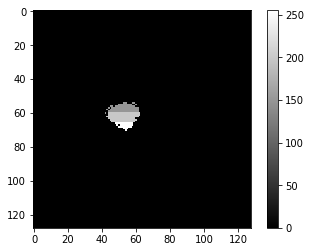

43509.0
127


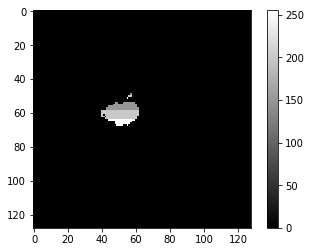

78285.0
127


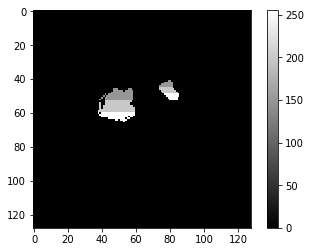

93976.0
127


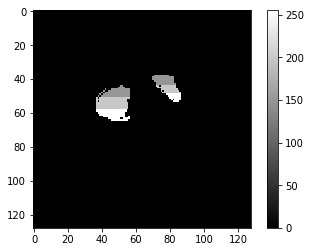

113672.0
127


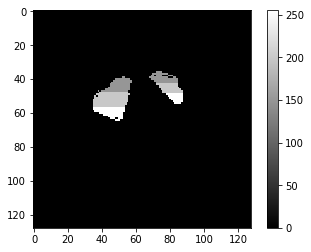

134150.0
127


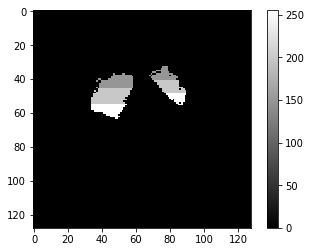

147460.0
127


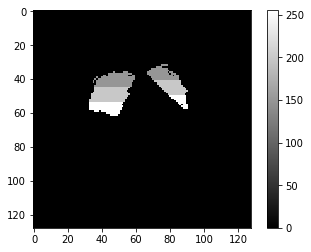

172070.0
127


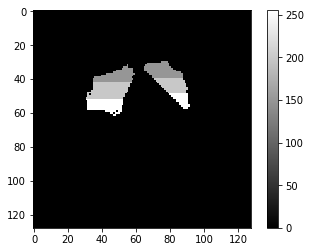

187990.0
127


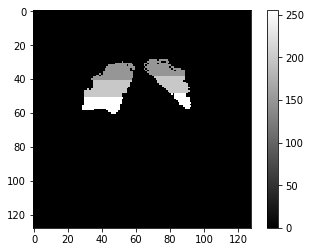

197955.0
127


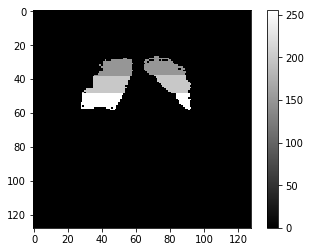

199755.0
127


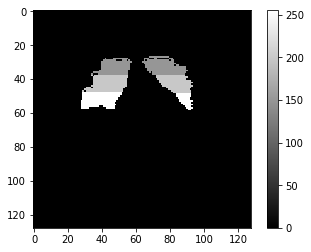

202105.0
127


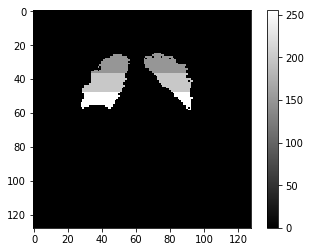

222160.0
127


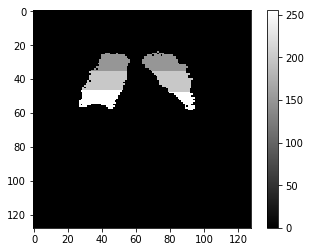

228476.0
127


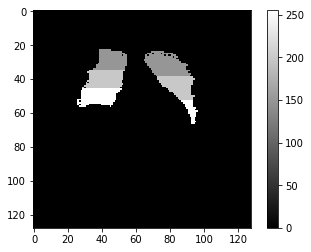

236115.0
127


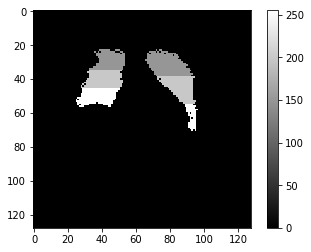

249000.0
127


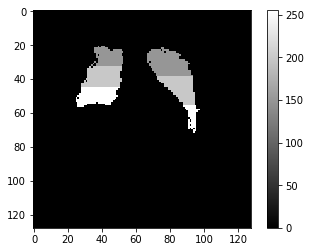

247576.0
127


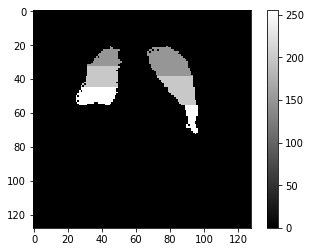

254421.0
127


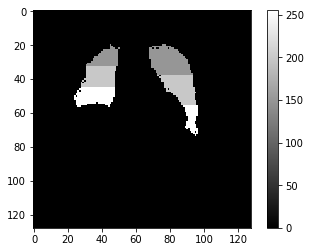

270111.0
127


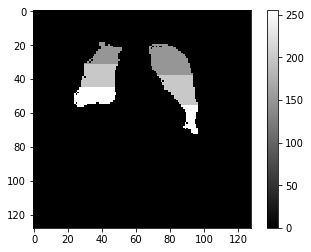

270095.0
127


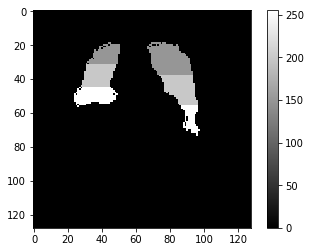

282220.0
127


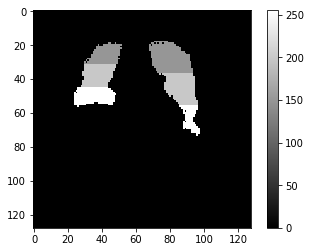

292945.0
127


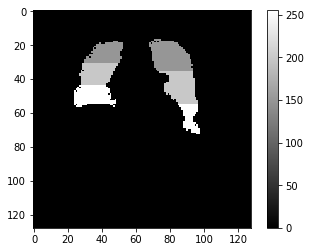

320067.0
127


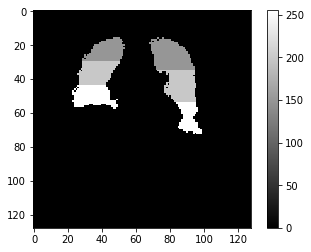

329665.0
127


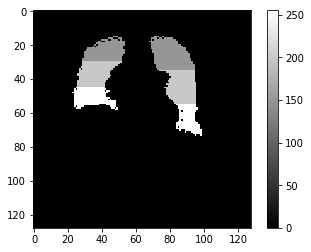

337570.0
127


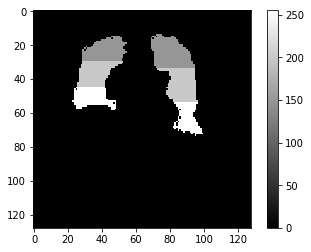

354650.0
127


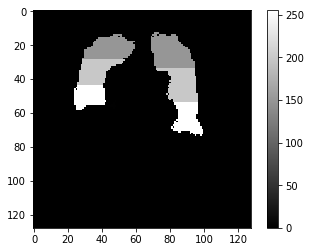

367171.0
127


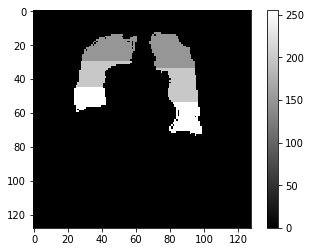

388402.0
127


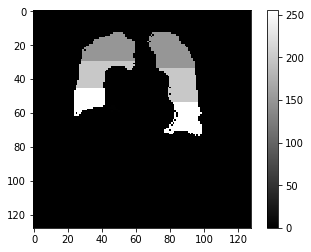

411643.0
127


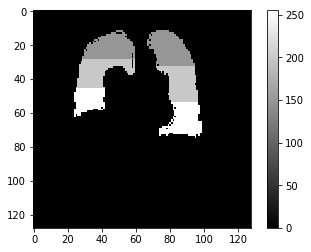

429810.0
127


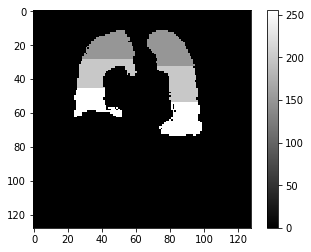

442705.0
127


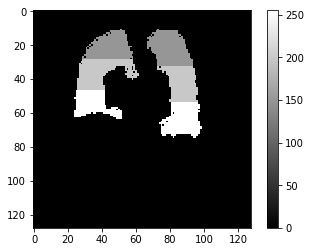

452715.0
127


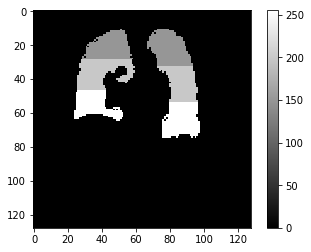

460763.0
127


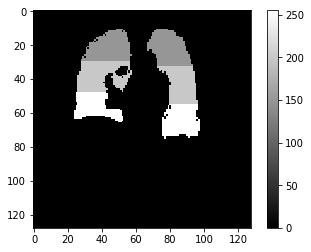

486780.0
127


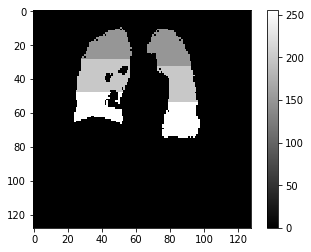

500840.0
127


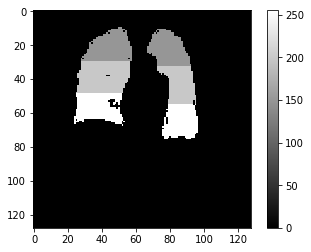

507110.0
127


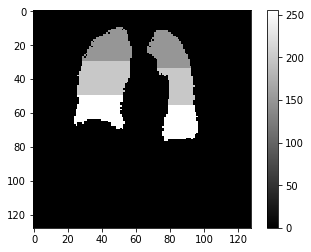

513950.0
127


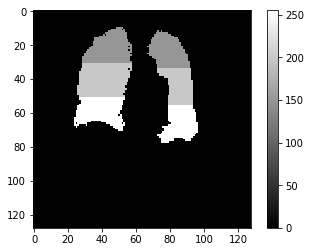

519460.0
127


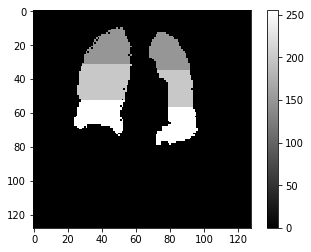

530670.0
127


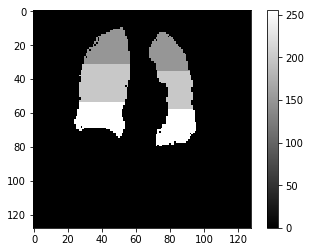

538285.0
127


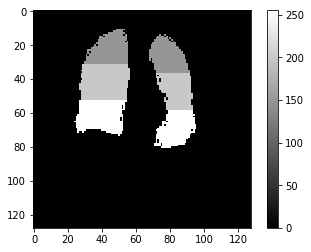

528025.0
127


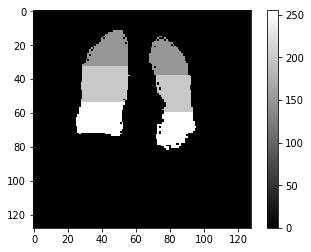

513797.0
127


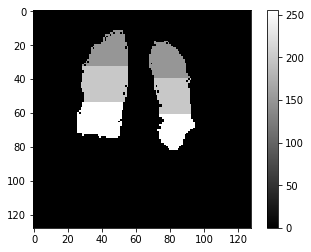

461816.0
127


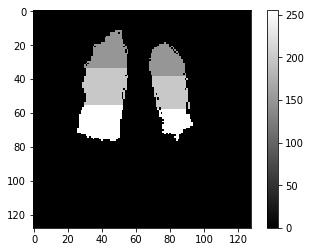

437057.0
127


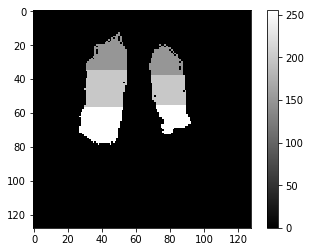

404527.0
127


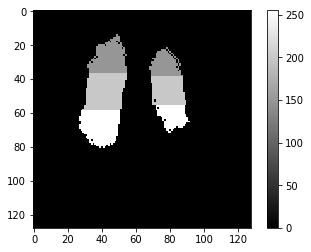

371551.0
127


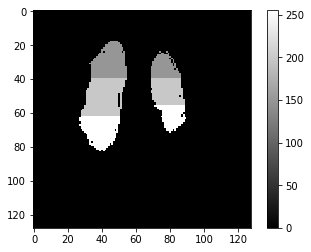

316406.0
127


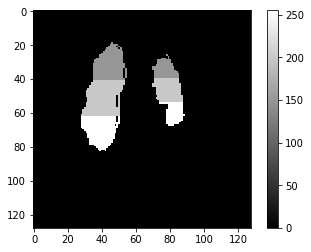

213526.0
127


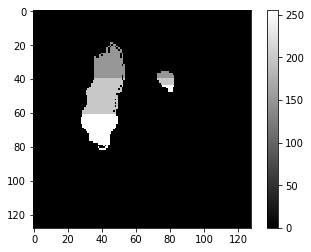

157169.0
127


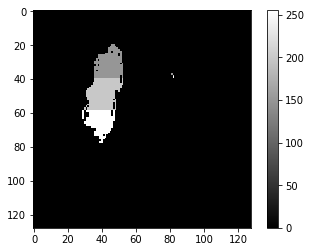

111616.0
127


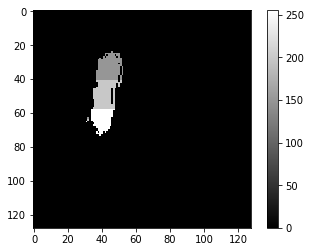

25300.0
127


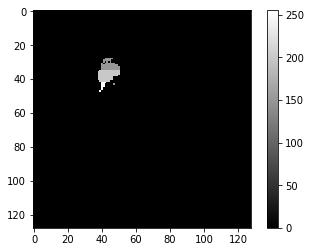

5215.0
127


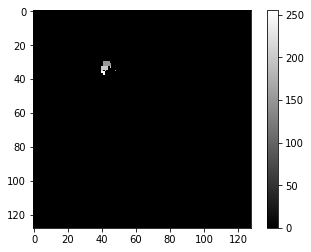

4075.0
127


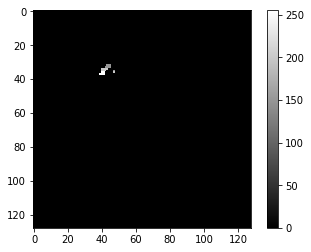

In [88]:
ns=3;
gray_level=[150,200,255];
for i in range(128):
    m=mask_reg[:,:,i].copy();
    


    output=cv2.connectedComponentsWithStats(m,4)

    num_labels = output[0];
    labels_im = output[1];
    stats=output[2];
    centroid=output[3];

    if(num_labels<=2):
        continue

    area=stats[:,4];
    # Delete the background label.
    area=area[1:]

    #Choose the label with largest and second largest except backgrounf
    index_label=np.array(heapq.nlargest(2, range(len(area)), key=area.__getitem__))+1;

    # Find which is left or right
    index_1 = index_label[0]
    index_2 = index_label[1]
    if (centroid[index_1,0]<centroid[index_2,0]):
        left_label=index_1;
        right_label=index_2;
    else:
        left_label=index_2;
        right_label=index_1;

    top_left= stats[left_label,1];
    height_left = stats[left_label,3];

    top_right= stats[right_label,1];
    height_right = stats[right_label,3];
    m=m.astype(np.float)
    [mm,nn] = m.shape

    sum_left=[0] * ns;
    sum_right=[0] * ns;

    num_left=[0] * ns;
    num_right=[0] * ns;

    for i in range(mm):
        for j in range(nn):

            if(labels_im[i,j]==left_label ):

                for nlf in range(ns):
                    if(i >= top_left +(height_left/3)*(nlf) and i <= top_left+ (height_left/3)*(nlf+1)):
                        m[i,j]=gray_level[nlf];


            elif (labels_im[i,j]==right_label):
                for nlf in range(ns):
                    if(i >= top_right +(height_right/3)*(nlf) and i <= top_right+ (height_right/3)*(nlf+1)):
                        m[i,j]=gray_level[nlf];



    print(sum(sum(m)))
    print(i)
    plt.imshow(m, cmap='gray')
    plt.colorbar()
    plt.show()




7400.0
127


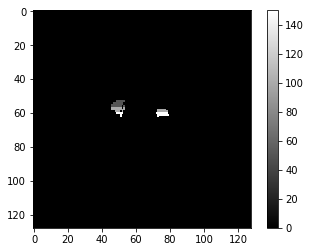

24750.0
127


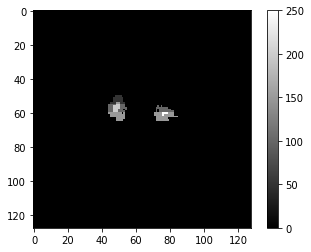

37603.0
127


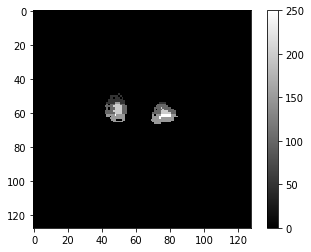

55050.0
127


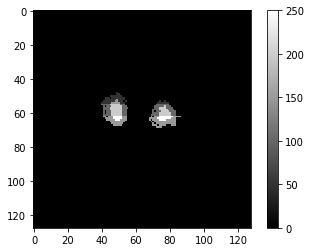

71252.0
127


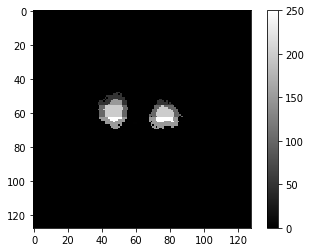

86754.0
127


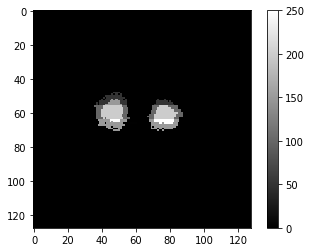

101450.0
127


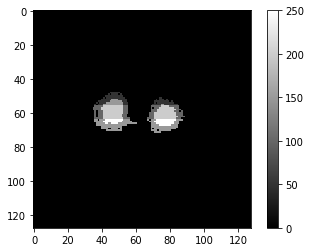

119800.0
127


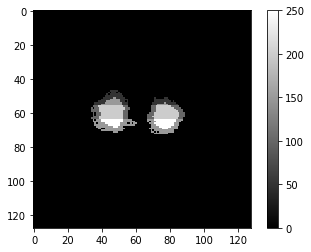

138503.0
127


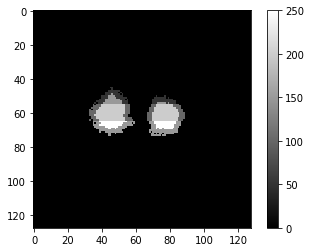

155550.0
127


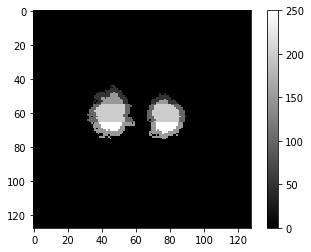

170354.0
127


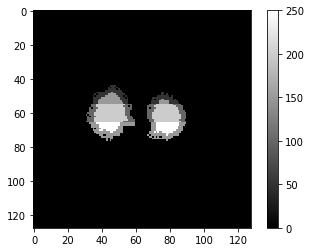

186309.0
127


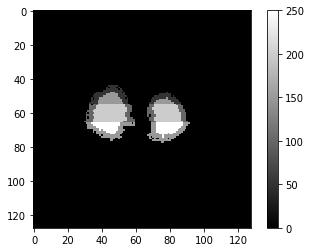

198750.0
127


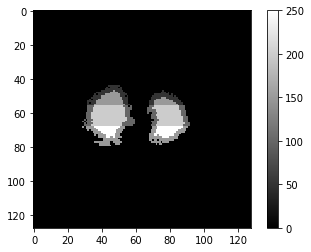

213100.0
127


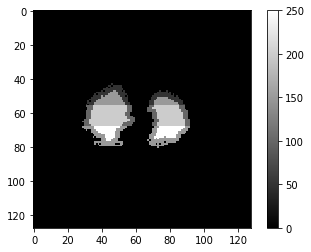

222500.0
127


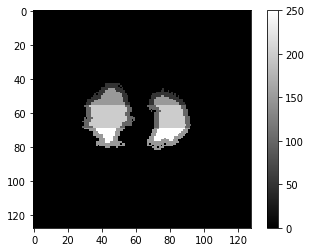

233800.0
127


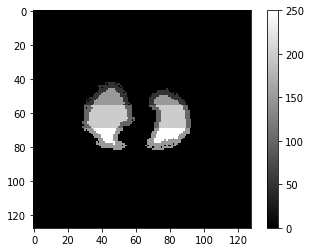

244504.0
127


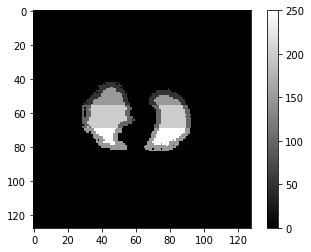

254250.0
127


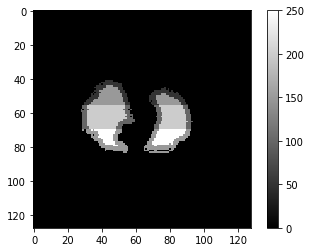

269400.0
127


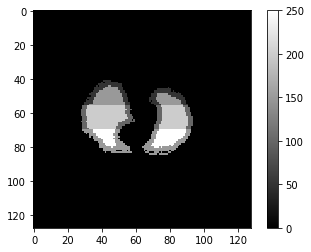

284250.0
127


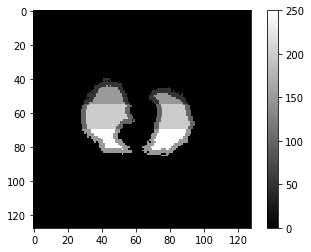

294150.0
127


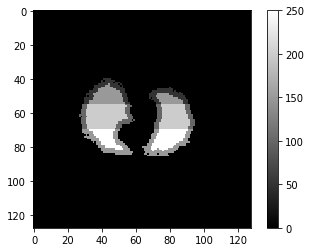

297550.0
127


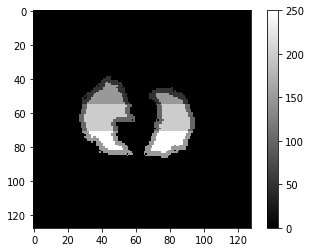

288253.0
127


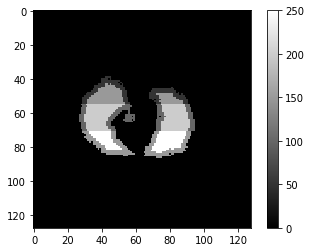

283754.0
127


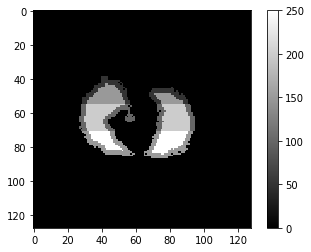

281457.0
127


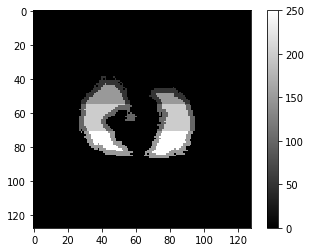

274957.0
127


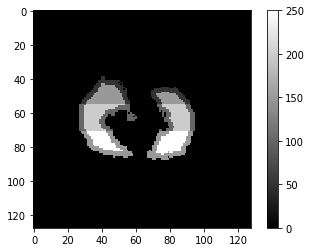

271150.0
127


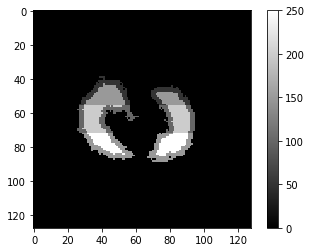

263209.0
127


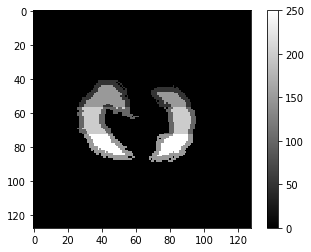

269250.0
127


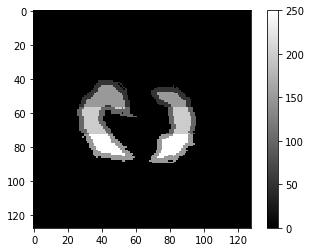

268601.0
127


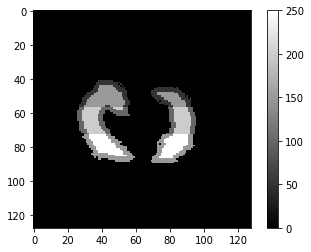

267052.0
127


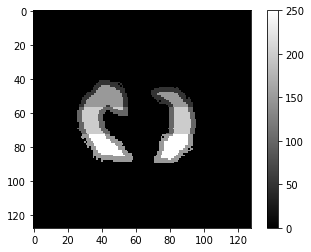

264655.0
127


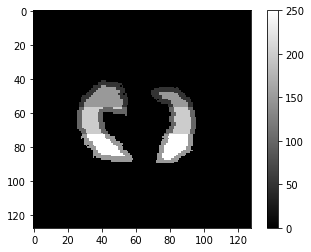

265207.0
127


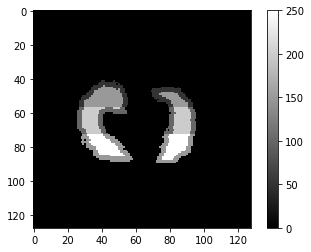

262650.0
127


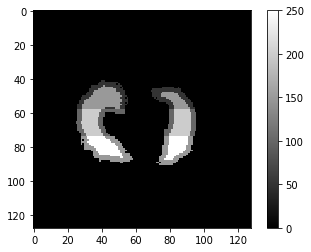

261300.0
127


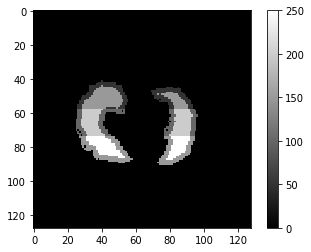

262150.0
127


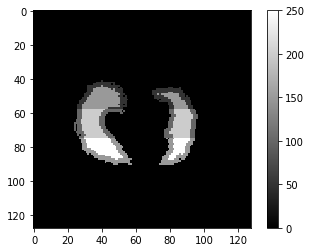

265200.0
127


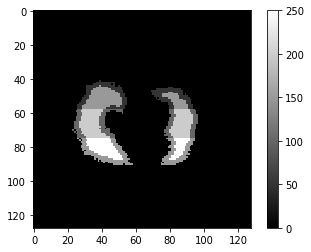

259550.0
127


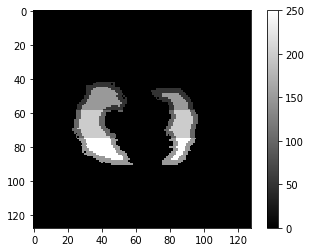

251150.0
127


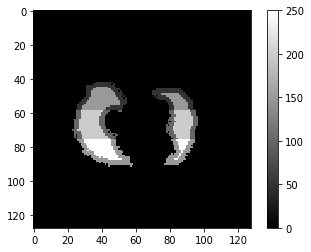

246000.0
127


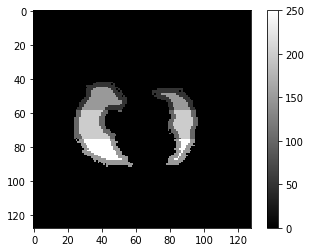

243100.0
127


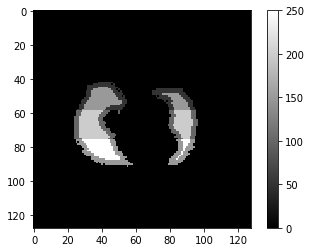

234900.0
127


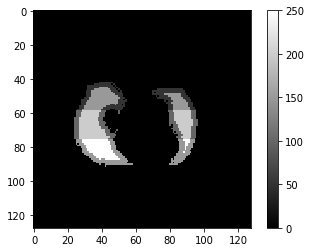

234650.0
127


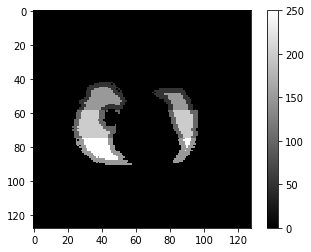

210850.0
127


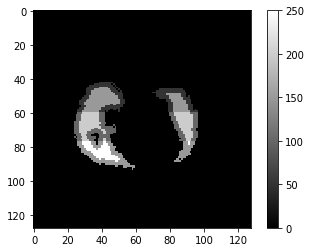

183550.0
127


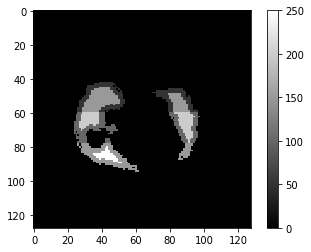

135932.0
127


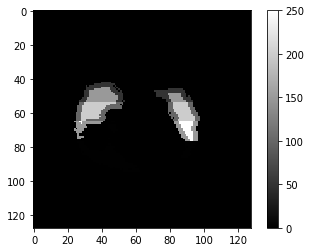

131853.0
127


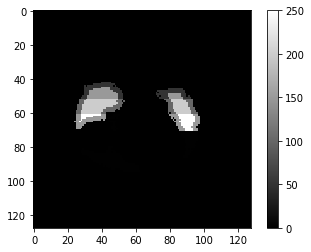

138406.0
127


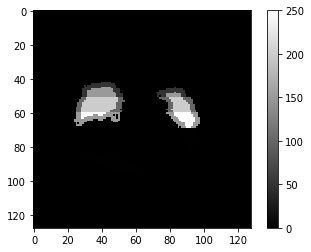

133812.0
127


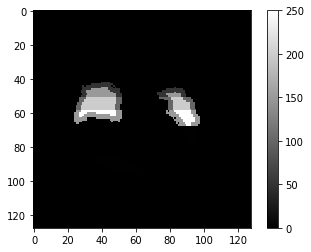

130091.0
127


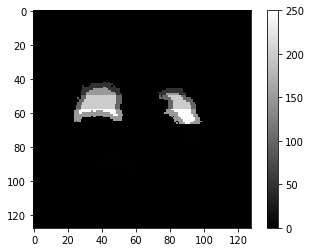

121620.0
127


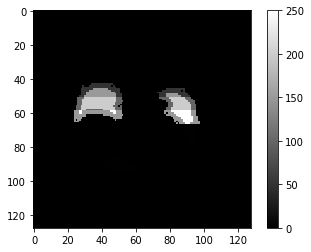

117510.0
127


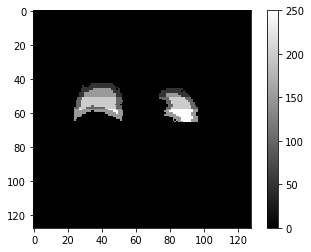

112613.0
127


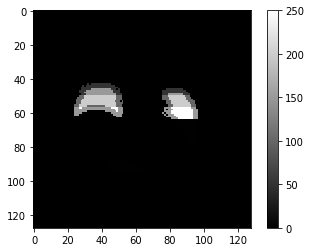

100922.0
127


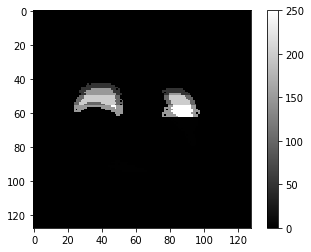

95688.0
127


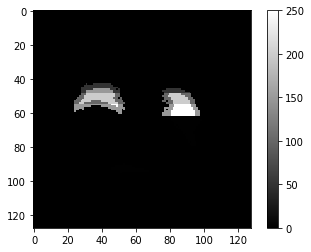

86424.0
127


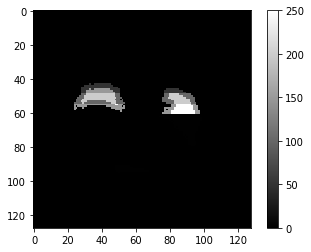

81844.0
127


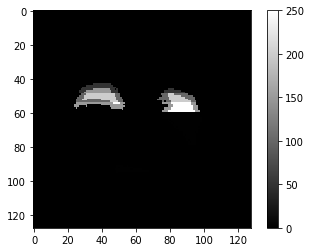

77332.0
127


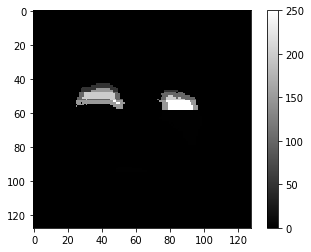

67710.0
127


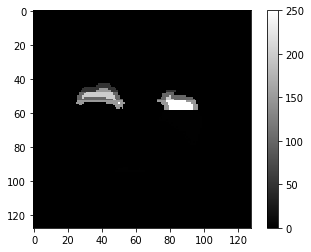

55662.0
127


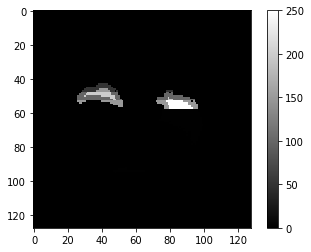

49932.0
127


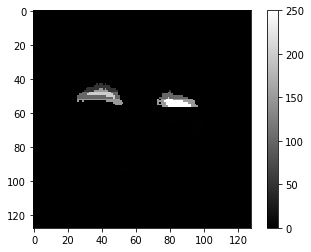

39889.0
127


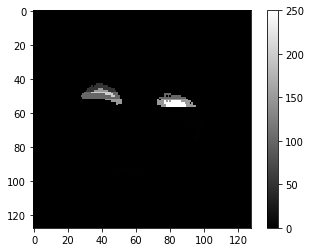

33996.0
127


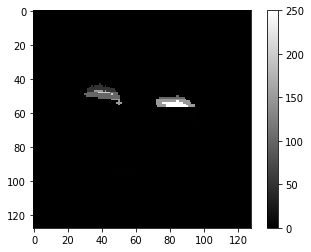

17300.0
127


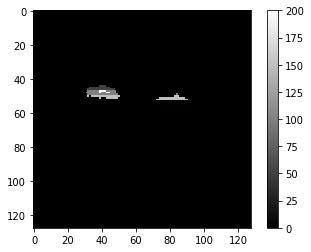

12173.0
127


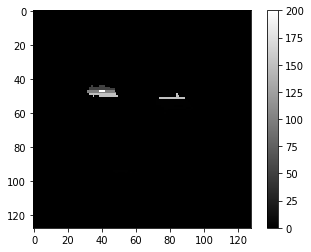

9692.0
127


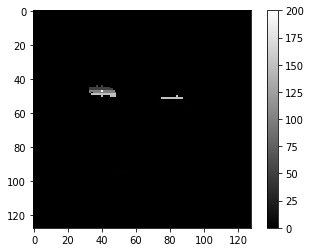

7286.0
127


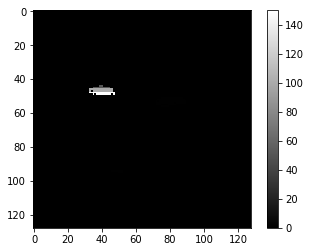

3754.0
127


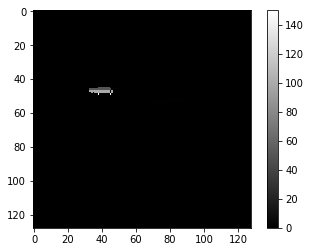

2734.0
127


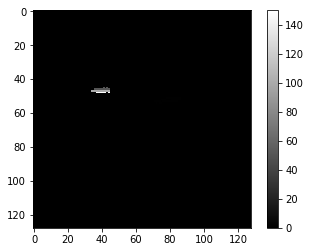

1621.0
127


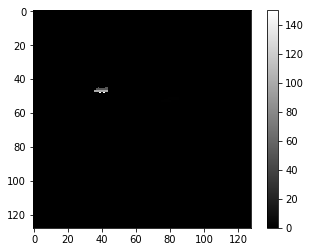

1607.0
127


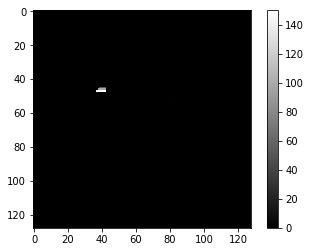

300.0
127


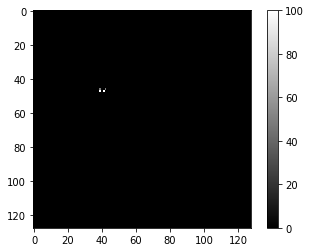

In [14]:
ns=3;
gray_level=[50,100,150];
number_cut=3;
for i in range(128):
    m=ndimage.rotate(mask_reg[i,:,:].copy(),90).copy();
    


    output=cv2.connectedComponentsWithStats(m,4)
    dist_transform = cv2.distanceTransform(m,cv2.DIST_L2,3)
    m=m.astype(np.float)
    num_labels = output[0];
    labels_im = output[1];
    stats=output[2];
    centroid=output[3];

    if(num_labels<=2):
        continue

    area=stats[:,4];
    # Delete the background label.
    area=area[1:]

    #Choose the label with largest and second largest except backgrounf
    index_label=np.array(heapq.nlargest(2, range(len(area)), key=area.__getitem__))+1;

    # Find which is left or right
    index_1 = index_label[0]
    index_2 = index_label[1]
    if (centroid[index_1,0]<centroid[index_2,0]):
        left_label=index_1;
        right_label=index_2;
    else:
        left_label=index_2;
        right_label=index_1;

    top_left= stats[left_label,1];
    height_left = stats[left_label,3];

    top_right= stats[right_label,1];
    height_right = stats[right_label,3];
    m=m.astype(np.float)
    [mm,nn] = m.shape

    sum_left=[0] * ns;
    sum_right=[0] * ns;

    num_left=[0] * ns;
    num_right=[0] * ns;

    for i in range(mm):
        for j in range(nn):

          

                    if(labels_im[i,j]==left_label ):


                            if((dist_transform[i,j]>0 and dist_transform[i,j]<=3)):
                                nlf = 0;
                            else:
                                nlf = 1; 
                            for ncut in range(number_cut):
                                if(i >= top_left +(height_left/3)*(ncut) and i <= top_left+ (height_left/3)*(ncut+1)):
                                    m[i,j]=gray_level[ncut]+100*nlf;



                    elif (labels_im[i,j]==right_label):

                            if((dist_transform[i,j]>0 and dist_transform[i,j]<=3)):
                                nlf = 0;
                            else:
                                nlf = 1; 

                            for ncut in range(number_cut):
                                if(i >= top_left +(height_left/3)*(ncut) and i <= top_left+ (height_left/3)*(ncut+1)):
                                    m[i,j]=gray_level[ncut]+100*nlf;






    print(sum(sum(m)))
    print(i)
    plt.imshow(m, cmap='gray')
    plt.colorbar()
    plt.show()
